In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
file = open('ML\\data\\dynamic_pus_using_pus47000_15PUs_noisy_std30_201910_0110_56.txt')
data = [[float(x) for x in line.split(',')] for line in file]



In [ ]:
# LOAD DATA
dataframe = pd.read_csv('ML\data\dynamic_pus_power_fixed_using_pus50000_15PUs_201912_2712_42_200_2.txt', delimiter=',', header=None)
dataframe_max = pd.read_csv('ML\data\dynamic_pus_power_fixed_max_power50000_15PUs_201912_2712_42_200.txt', delimiter=',', header=None)

dataframe.reset_index(drop=True, inplace=True)
dataframe_max.reset_index(drop=True, inplace=True)

dataframe_tot = pd.concat([dataframe, dataframe_max.iloc[:, dataframe_max.columns.values[-1]]], axis=1,
                        ignore_index=True)
idx = dataframe_tot[dataframe_tot[dataframe_tot.columns[-1]] == -float('inf')].index
dataframe_tot.drop(idx, inplace=True)

data_reg = np.concatenate((dataframe_tot.values[:, 0:dataframe_tot.shape[1]-3], 
                           dataframe_tot.values[:, dataframe_tot.shape[1]-1:dataframe_tot.shape[1]]), axis=1)
data_class = dataframe_tot.values[:, 0:dataframe_tot.shape[1]-1]
y_class_power = dataframe_tot.values[:, -1]
del dataframe, dataframe_max

In [ ]:
data = data_reg

In [ ]:
normalized = True
m = len(data)
n = len(data[0])
X, y = [], []
for d in data:
    X.append(d[:n-1])
    y.append(float(d[-1]))
del data
X = np.asarray(X)
X = X.astype(int)
y = np.asarray(y)

In [ ]:
X

In [ ]:
# training_samples = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 
#                     200, 250, 300, 400, 500, 700] + list(range(1000,10001,1000)) + list(range(12000, 40001, 4000))
# training_samples = [5, 10, 20, 30, 40, 50,60, 70, 80, 90, 100, 120, 150, 200, 250, 300, 400, 500, 700, 1000, 2000]
# training_samples = [50, 200, 2000, 5000, 9000, 13000, 18000, 23000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
# test_samples = [x//3 for x in training_samples]
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 4001, 1000))
# training_samples = [5000]
test_samples = 40000

In [ ]:
k = 1
total_accuracy = []
total_f1_score = []
total_fp = []
accuracy = []
f1_score = []
fp = []
for i_train, training_sample in enumerate(training_samples):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8511, random_state=4)
    if normalized:
        mu = np.mean(X_train[:training_sample], axis=0)
        std = np.std(X_train[:training_sample], axis=0)
        X_train = (X_train[:training_sample] - mu) / std
        X_test = (X_test[:test_samples] - mu) / std
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[:training_sample], y_train[:training_sample])
    y_pred = knn.predict(X_test[:test_samples]) # test_samples[i_train]
    accuracy.append(round(metrics.accuracy_score(y_test[:test_samples], y_pred)*100, 2))
    f1_score.append(round(metrics.f1_score(y_test[:test_samples], y_pred)*100, 2))
    idx = y_test[:test_samples]==1
    fp.append(sum(y_pred) - sum(y_pred[idx]))
total_accuracy.append(accuracy)
total_f1_score.append(f1_score)
total_fp.append(fp)

In [ ]:
k = 4
accuracy = []
f1_score = []
fp = []
for i_train, training_sample in enumerate(training_samples):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8511, random_state=4)
    if normalized:
        mu = np.mean(X_train[:training_sample], axis=0)
        std = np.std(X_train[:training_sample], axis=0)
        X_train = (X_train[:training_sample] - mu) / std
        X_test = (X_test[:test_samples] - mu) / std
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[:training_sample], y_train[:training_sample])
    y_pred = knn.predict(X_test[:test_samples])
    accuracy.append(round(metrics.accuracy_score(y_test[:test_samples], y_pred)*100, 2))
    f1_score.append(round(metrics.f1_score(y_test[:test_samples], y_pred)*100, 2))
    idx = y_test[:test_samples]==1
    fp.append(sum(y_pred) - sum(y_pred[idx]))  
total_accuracy.append(accuracy)
total_f1_score.append(f1_score)
total_fp.append(fp)

In [ ]:
X_test

In [ ]:
# KNN regression
k = 4
average_reg_diff_power, best_c_reg_lst, fp_mean_power = [], [], []
for i_train, training_sample in enumerate(training_samples):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8511, random_state=4)
    if False:
        mu = np.mean(X_train[:training_sample], axis=0)
        std = np.std(X_train[:training_sample], axis=0)
        X_train = (X_train[:training_sample] - mu) / std
        X_test = (X_test - mu) / std
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X_train[:training_sample], y_train[:training_sample])
    y_pred = knn.predict(X_test)
    
    #evaluating
    average_reg_diff_power.append(round(np.mean(np.absolute(y_test - y_pred)), 3))
    fp_samples = np.zeros(len(y_test), dtype=float)
    fp_samples[y_pred > y_test] = (y_pred - y_test)[y_pred > y_test]
    fp_mean_power.append(round(np.mean(fp_samples), 3))
    print('Number_samples: ', training_sample, ' error: ', average_reg_diff_power[-1], ', fp_error:', fp_mean_power[-1])

In [ ]:
X_train.shape

In [ ]:
print(average_reg_diff_power)
print(fp_mean_power)

In [ ]:
X_test.shape

In [ ]:
len(y_pred[idx])

In [ ]:
# results for LR and NN brought from matlab, index 2 for LR and 3 for NN
total_accuracy.append([74.36, 76.18, 76.3, 77.5, 77.4, 77.6, 77, 76.58, 76.67, 76.28, 76.72, 76.5, 76.85, 76.77])
total_f1_score.append([81.39, 83.94, 85, 84.96, 84.8, 85.4, 84.88, 84.30, 84.5, 84.26, 84.6, 84.5, 84.7, 84.6])
total_fp.append([100, 281, 633, 709, 1012, 1281, 1715, 2219, 2932, 3445, 4068, 4664, 5130, 5676])

# NN
total_accuracy.append([77.66 , 78.64, 79.9, 77.15, ])
total_f1_score.append([83.31,  85.77, 86.48, 85, ])
total_fp.append([76, 275, 416, 769, ])

In [ ]:
# number of validation samples are samll(training_samples // 3)
# LR  
total_accuracy.append([54.49, 56.47, 69.93, 70.04, 63.74, 65.33, 75.51, 73.01, 75.53, 70.58, 75.77, 69.54, 75.19, 72.96, 75.98,
                       73.26, 76.88, 76.78, 75.77, 76.76, 76.71])
total_f1_score.append([67.61, 62.61, 82.30, 81.52, 73.13, 74.52, 83.72, 81.39, 83.63, 77.51, 84.53, 76.34, 82.69, 80.01, 83.75,
                       80.09, 85.11, 84.90, 83.04, 84.84, 84.87])
total_fp.append([7847, 3415, 10224, 8877, 5337, 5248, 5955, 5461, 5796, 3464, 6981, 3286, 4799, 3819, 5435, 3599, 6545, 6313,
                 4630, 6231, 6361])

## NN
total_accuracy.append([30.07, 32.66, 66.29, 64.93, 73.39, 69.86, 71.16, 61.86, 70.18, 74.58, 75.71, 69.83, 74.57, 70.37, 72.70,
                       72.24, 77.21, 77.63, 78.66, 79.05, 77.86])
total_f1_score.append([0, 7.540, 74.27, 75.59, 82.37, 77.77, 78.95, 68.09, 76.91, 83.41, 84.52, 77.57, 82.13, 77.40, 80.26,
                      79.24, 85.10, 84.64, 85.12, 85.97, 84.94])
total_fp.append([0, 53, 4230, 6609, 6405, 4389, 4409, 3027, 3250, 6597, 7025, 4222, 4733, 3549, 4376, 3675, 6094, 4778, 4230,
                 5170, 4975])

In [ ]:
# number of validation samples are large(34000)
# LR  
total_accuracy.append([69.93, 66.78, 69.93, 70.51, 71.49, 73.47, 75.48, 75.26, 75.54, 75.71, 75.63, 74.99, 76.25, 76.68, 75.92, 
                       76.79, 77.07, 76.96, 76.37, 76.88, 76.64])
total_f1_score.append([82.30, 79.66, 82.30, 82.56, 82.81, 83.60, 83.66, 84.24, 84.64, 83.96, 83.49, 83.27, 84.38, 85.04, 83.67, 
                       85.14, 85.17, 84.93, 84.59, 84.79, 84.76])
total_fp.append([10224, 9646, 10224, 9979, 9266, 8225, 5912, 7110, 7455, 6105, 5454, 5894, 6107, 6686, 5392, 6724, 6409, 6127, 
                 6308, 5999, 6258])

## NN
total_accuracy.append([69.93, 69.93, 73.59, 74.21, 73.18, 71.48, 73.84, 73.13, 73.65, 73.66, 73.82, 74.86, 76.84, 75.34, 76.41, 
                       76.19, 78.32, 79.33, 78.39, 79.31, 79.82])
total_f1_score.append([82.30, 82.30, 83.47, 82.13, 81.16, 81.75, 82.17, 82.83, 82.06, 82.65, 82.84, 83.95, 84.27, 83.18, 84.73, 
                       84.06, 85.03, 85.67, 85.40, 85.49, 86.09])
total_fp.append([10224, 10224, 7877, 5140, 4982, 7641, 5607, 7398, 5671, 6518, 6608, 7131, 5194, 5339, 6484, 5666, 4529, 4262,
                 5059, 3978, 4320])

In [ ]:
# 2, field 4k x 4k, number of validation samples are samll(training_samples // 3), test samples=400000
# LR  
training_samples = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 200, 250, 300, 400, 500, 700, 1000, 2000, 3000,
                    4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000,
                    20000, 30000, 40000, 50000, 60000, 70000, 80000]
total_accuracy.append([86.32, 81.36, 58.48, 84.74, 88.50, 89.78, 88.80, 90.71, 89.26, 89.29, 90.45, 94.19, 93.95, 94.16, 92.60, 94.78, 94.20, 
                       93.64, 95.02, 94.94, 95.34, 95.32, 95.49, 95.45, 95.44, 95.55, 95.49, 95.47, 95.49, 95.43, 95.50, 95.49, 95.55, 95.31,
                       95.49, 95.47, 95.31, 95.57, 95.47, 95.56, 95.49, 95.50, 95.46, 95.50, 95.51])
total_f1_score.append([85.47, 82.70, 68.77, 85.65, 88.70, 89.83, 89.01, 90.60, 89.39, 89.39, 90.42, 93.55, 93.21, 93.91, 92.49, 94.25, 93.94, 93.37, 
                       94.60, 94.43, 94.98, 94.95, 95.13, 95.10, 95.09, 95.20, 95.14, 95.12, 95.14, 95.08, 95.15, 95.13, 95.20, 94.86, 95.13, 95.11,
                       94.87, 95.23, 95.12, 95.22, 95.15, 95.16, 95.12, 95.15, 95.16])
total_fp.append([32822, 69801, 166077, 60302, 43630, 38531, 43342, 33253, 41012, 40444, 35531, 8890, 7314, 20726, 28944, 9237, 
                 20424, 21704, 11616, 8958, 12200, 11772, 11420, 11765, 11967, 11422, 11606, 11680, 11660, 11803, 11735, 11689,
                 11638, 9246, 11707, 11710, 9292, 11673, 11892, 11730, 12025, 11974, 11969, 11904, 11926])

## NN
total_accuracy.append([45.72, 45.96, 45.72, 80.95, 83.85, 45.72, 45.72, 84.86, 84.46, 82.90, 90.14, 83.66, 84.65, 85.26, 85.75, 
                       85.06, 89.34, 89.05, 88.91, 89.94, 90.42, 89.54, 92.32, 90.16, 92.33, 89.51, 89.67, 90.10, 91.52, 90.25, 
                       91.94, 89.49, 91.57, 91.27, 92.86, 92.88, 93.11, 92.49, 90.17, 91.35, 92.75, 90.32, 91.93, 91.12, 91.99])
total_f1_score.append([62.75, 62.58, 62.75, 80.48, 82.77, 62.75, 62.75, 85.10, 83.55, 82.56, 89.79, 81.64, 83.95, 83.27, 85.54, 
                       81.54, 88.74, 88.45, 88.34, 89.34, 90.13, 88.08, 91.75, 89.67, 91.75, 88.50, 88.79, 89.11, 90.78, 89.43,
                       91.31, 88.29, 90.89, 90.60, 92.39, 92.23, 92.55, 91.74, 89.59, 90.33, 92.35, 89.46, 91.33, 90.41, 91.38])
total_fp.append([217125, 214088, 217125, 50414, 36889, 217125, 217125, 50558, 37131, 47468, 29949, 27800, 39024, 22810, 42774, 8969,
                 27735, 28556, 29643, 26048, 30311, 13419, 18500, 27460, 18372, 20638, 22009, 18732, 18133, 21101, 18723, 17629, 19028,
                 20339, 18930, 14630, 15850, 13839, 25656, 13299, 20939, 20227, 19406, 20075, 19063])


In [ ]:
# 2, field 4k x 4k, number of validation samples are samll(training_samples // 3), test samples=400000, uniform pus
# LR  
training_samples = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 200, 250, 300, 400, 500, 700, 1000, 2000]
total_accuracy.append([58.54, 89.22, 87.22, 88.05, 93.33, 91.74, 92.07, 89.21, 91.78, 89.79, 91.27, 92.15, 92.77, 92.74, 92.93,
                       91.82, 94.39, 94.14, 93.94, 94.33, 95.33])
total_f1_score.append([55.50, 89.40, 85.98, 86.67, 93.18, 91.14, 91.54, 90.06, 91.20, 90.53, 90.53, 91.67, 92.96, 92.35, 92.55,
                       91.08, 94.18, 94.01, 93.69, 94.17, 95.27])
total_fp.append([73065, 28726, 11624, 6942, 12818, 6680, 6932, 42508, 6883, 39822, 5698, 7846, 23644, 7986, 7760, 3671, 7751,
                 11331, 8098, 9381, 10501])

## NN
total_accuracy.append([50.94, 70.87, 50.79, 79.28, 87.16, 82.76, 85.55, 85.47, 86.14, 85.67, 86.08, 85.82, 87.32, 86.07, 88.97, 
                       89.94, 87.69, 87.07, 89.33, 88.67, 89.71])
total_f1_score.append([0, 72.38, 0.3200, 77.60, 86.12, 81.48, 83.93, 84.03, 85.03, 84.90, 84.74, 84.14, 87.60, 85.60, 88.47, 
                       90.28, 87.36, 85.64, 88.72, 87.74, 88.94])
total_fp.append([0, 73015, 932, 30288, 14497, 24460, 12502, 14781, 16686, 22163, 14043, 10918, 33595, 25238, 17214, 30899,
                 23278, 9634, 14341, 11413, 10386])


In [ ]:
# 3, field 4k x 4k, number of validation samples are samll(training_samples // 3), test samples=40000, dynamic pus

# total_accuracy = [[57.47, 58.05, 56.78, 58.54, 58.9, 59.42, 60.12, 60.42, 60.2, 61.21, 61.72, 62.12, 62.61, 63.58, 64.07, 64.63, 64.46, 64.86, 65.15, 65.42, 65.92, 66.44, 66.87, 67.19, 67.23, 67.52, 67.67, 68.04, 68.26, 68.18, 68.59, 69.0, 69.27, 69.11, 69.44, 69.56, 69.54],
# [53.1, 59.48, 60.96, 62.05, 62.44, 63.28, 64.04, 64.76, 65.16, 65.46, 65.46, 66.34, 66.84, 66.96, 67.62, 68.23, 67.95, 68.2, 69.34, 69.2, 70.49, 71.52, 71.99, 72.4, 72.4, 72.91, 72.93, 73.24, 73.5, 73.26, 73.78, 74.04, 74.39, 74.83, 74.9, 75.02, 75.1]]
# total_f1_score = [[58.08, 59.06, 59.77, 58.85, 59.6, 61.81, 61.95, 63.1, 63.21, 62.55, 61.77, 62.67, 62.01, 61.84, 62.18, 62.93, 62.7, 62.97, 63.24, 62.96, 63.7, 64.12, 64.9, 64.99, 64.92, 65.46, 65.4, 65.89, 66.12, 66.09, 66.58, 66.86, 67.28, 67.2, 67.45, 67.52, 67.47],
#  [0.0, 43.18, 57.61, 53.86, 56.1, 59.49, 59.46, 62.32, 63.14, 60.62, 58.28, 60.49, 59.02, 57.41, 58.49, 59.6, 58.94, 59.01, 60.87, 60.25, 62.36, 63.67, 64.67, 64.95, 64.94, 66.06, 65.77, 66.24, 66.68, 66.35, 67.11, 67.36, 68.05, 68.71, 68.71, 68.86, 68.97]]
# total_fp = [[10041, 10127, 11370, 9682, 9803, 10606, 10179, 10609, 10833, 9716, 8920, 9108, 8404, 7612, 7429, 7394, 7406, 7251, 7168, 6832, 6835, 6662, 6744, 6544, 6478, 6548, 6392, 6377, 6323, 6377, 6318, 6147, 6172, 6253, 6130, 6072, 6066],
#  [0, 3610, 7468, 5278, 5866, 6713, 6179, 6993, 7115, 5693, 4704, 5010, 4054, 3367, 3318, 3322, 3261, 3112, 3044, 2897, 2820, 2618, 2697, 2512, 2502, 2619, 2468, 2452, 2444, 2479, 2429, 2336, 2392, 2360, 2306, 2284, 2274]]

# LR
training_samples = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 
                    200, 250, 300, 400, 500, 700] + list(range(1000,10001,1000)) + list(range(12000, 40001, 4000))
total_accuracy.append([49.32, 57.16, 58.84, 63.02, 67.25, 75.55, 78.45, 77.66, 83.03, 83.97, 84.59, 86.98, 85.71, 82.72,
                       87.39, 89.32, 86.58, 86.68, 90.89, 90.88, 91.39, 91.72, 91.77, 91.91, 91.51, 92.01, 92.10, 92.09, 
                       92.13, 92.15, 92.05, 92.16, 92.13, 92.10, 92.14, 92.13, 92.15])
total_f1_score.append([62.88, 63.25, 28.63, 39.62, 50.99, 76.77, 79.23, 79.86, 82.10,83.10, 83.92, 86.18, 83.17, 77.95, 85.46,
                       88.23, 83.82, 83.96, 90.18, 90.63, 91.17, 91.31, 91.18, 91.33, 91.34, 91.62, 91.73, 91.72, 91.75, 91.77,
                       91.50, 91.79, 91.76, 91.54, 91.58, 91.58, 91.59])
total_fp.append([18813, 13256, 1135, 1013, 1285, 7301, 6431, 8029, 3724, 3544, 3621, 2814, 1209, 504, 1238, 1660, 649, 649, 1757,
                 2681, 2592, 2084, 1681, 1655, 2672, 2057, 2072, 2059, 2035, 2010, 1656, 2054, 2063, 1633, 1618, 1622, 1607])

## NN
total_accuracy.append([49.16, 58.89, 61.38, 66.94, 72.63, 75.52, 79.14, 80.12, 79.99, 82.85, 82.76, 85.68, 86.63, 83.74, 87.55,
                       87.79, 86.84, 89.48, 90.07, 91.21, 91.80, 91.13, 92, 92.04, 91.97, 91.97, 92.05, 92.12, 92.07, 92.17, 
                       92.08, 92.07, 92.12, 92.15, 92.20, 92.16, 92.23])
total_f1_score.append([63.28, 63.07, 41.54, 54.61, 70.67, 71.77, 78.44, 77.37, 77.12, 81.23, 80.69, 84.45, 85.53, 79.66, 85.78,
                       85.90, 84.43, 88.44, 89.29, 90.76, 91.30, 90.62, 91.56, 91.59, 91.56, 91.62, 91.73, 91.75, 91.76, 91.81,
                       91.57, 91.53, 91.56, 91.62, 91.75, 91.68, 91.77])
total_fp.append([19228, 11850, 2306, 2547, 5510, 3603, 4896, 2912, 2867, 3078, 2683, 2658, 2520, 613, 1380, 1128, 900, 1691, 1895,
                 2174, 1881, 2071, 1930, 1886, 2019, 2129, 2190, 2040, 2181, 2045, 1741, 1686, 1635, 1684, 1850, 1779, 1820])

In [ ]:
# 4, fixed training samples, changing noise, field 4k*4k, triaining samples 5k, validation samples 1.67k, test samples 40k
noise_level = [-5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 20]  # equivallentt to [-5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 20] dB
p_1 = [0.59, 0.61, 0.65, 0.67, 0.7, 0.74, 0.76, 0.8, 0.84, 0.86, 0.95]
total_accuracy = [[67.06, 67.40, 68.28, 69.08, 70.14, 72.23, 72.99, 75.59, 77.76, 80.16, 90.18],
                 [71.58, 71.80, 72.68, 73.36, 73.80, 75.43, 76.23, 78.26, 80.44, 82.86, 93.02],
                 [90.86, 90.40, 90.71, 90.84, 90.78, 90.83, 90.51, 90.54, 90.89, 90.67, 94.62],
                 [90.96, 90.35, 90.74, 90.85, 90.85, 90.88, 90.38, 90.49, 90.88, 90.57, 94.55]]

total_f1_score = [[72.21, 73.05, 76.07, 77.41, 78.87, 81.36, 82.48, 84.98, 86.75, 88.55, 94.80],
                 [73.35, 71.80, 78.10, 79.62, 80.79, 83.17, 84.43, 86.72, 88.47, 90.26, 96.37],
                 [92.44, 92.40, 92.88, 93.36, 93.48, 93.86, 93.76, 94.09, 94.62, 94.66, 97.24],
                 [92.44, 92.00, 92.91, 93.34, 93.54, 93.87, 93.66, 94.48, 94.61, 94.65, 97.20]]

total_fp = [[6663, 6435, 6695, 6603, 6237, 5892, 5711, 5538, 4569, 4140, 1896],
           [3534, 3527, 4314, 4513, 4500, 4662, 4757, 4535,  4395, 4123, 2018],
           [2537, 2845, 1785, 2497, 2069, 2200, 1730, 2028, 2212, 2401, 2151],
           [2236, 1689, 1777, 2398, 2100, 2093, 1674, 2053, 2274, 2679, 2122]]

######### DRAW ACCURACY ##############
plt.figure(figsize=(15,8))
plt.plot(noise_level, total_accuracy[0])
plt.plot(noise_level, total_accuracy[1], 'r--')
plt.plot(noise_level, total_accuracy[2], 'g.-')
plt.plot(noise_level, total_accuracy[3], 'y->')
plt.xlabel('Noise Level(dB)')
plt.ylabel('Percent(%)')
plt.title('Accuracy of prediction')
plt.grid(True)
# plt.xticks([-5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 20])
plt.text(10, 70, '# train = 5k')
plt.text(10, 68, '# Test = 40k')
plt.legend(['1-NN', '4-NN', 'LR', 'NN'])
plt.savefig('ML\\results\\changing_noise_level_test50k_train5k_4kx4k_smallVal_compare_dynamicPUS.png')

plt.figure(figsize=(15,8))
plt.plot(noise_level, total_fp[0])
plt.plot(noise_level, total_fp[1], 'r--')
plt.plot(noise_level, total_fp[2], 'g.-')
plt.plot(noise_level, total_fp[3], 'y->')
plt.xlabel('Noise Level(dB)')
plt.ylabel('#')
plt.title('False Positive')
plt.grid(True)
plt.text(15, 4900, '# train = 5k')
plt.text(15, 5100, '# Test = 40k')
plt.legend(['1-NN', '4-NN', 'LR', 'NN'])
plt.savefig('ML\\results\\changing_noise_level_test50k_train5k_4kx4k_smallVal_compare_dynamicPUS_FP.png')

plt.figure(figsize=(15,8))
plt.plot(noise_level, [x*100 for x in p_1])
plt.xlabel('Noise Level(dB)')
plt.ylabel('%')
plt.title('Probability(y==1)')
plt.grid(True)
# plt.text(15, 7, '# train = 5k')
# plt.text(15, 5, '# Test = 40k')
# plt.legend(['1-NN', '4-NN', 'LR', 'NN'])
plt.savefig('ML\\results\\changing_noise_level_test50k_train5k_4kx4k_smallVal_compare_dynamicPUS_P.png')

In [ ]:
# 5, fixed training samples, changing noise, field 4k*4k, triaining samples 5k, validation samples 1.67k, test samples 40k
# new propagation model: pu-pur just log normal, su-pur increase or decrease all the values by the same sign
noise_level = [-5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 20, 30]  # equivallentt to [-5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 20] dB
p_1 = [0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.46, 0.46, 0.46,  0.45, 0.40, 0.28]
total_accuracy = [[66.85, 66.76, 67.08, 67.27, 67.03, 67.26, 66.84, 67.04, 66.64, 66.53, 64.18, 63.64],
                 [72.24, 72.47, 72.42, 72.61, 71.91, 72.52, 72.14, 71.61, 71.54, 70.34, 68.13, 70.39, ],
                 [92.04, 91.77, 92.06, 91.10, 91.44, 92.15, 91.71, 91.53, 91.33, 90.46, 85.90, 73.18],
                 [92.15, 92.56, 92.12, 90.78, 91.86, 92.17, 91.71, 91.54, 91.40, 90.48, 86.10, 74.26]]

total_f1_score = [[65.35, 64.92, 65.27, 64.83, 64.93, 65.50, 65.18, 64.27, 64.28, 62.33, 55.94, 37.67],
                 [65.65, 65.50, 65.45, 65.00, 64.51, 65.86, 65.43, 63.21, 63.59, 59.29, 50.01, 23.76],
                 [91.83, 91.34, 91.51, 91.06, 91.41, 91.65, 91.45, 91.16, 90.98, 89.36, 83.60, 51.06],
                 [91.90, 91.34, 91.59, 90.81, 91.26, 91.70, 91.37, 91.19, 91.06, 89.37, 84.43, 64.35]]

total_fp = [[6985, 6916, 6823, 6465, 6519, 6813, 6763, 6465, 6823, 6397, 7277, 7557],
           [2910, 2786, 2756, 2433, 2565, 2881, 2772, 2534, 2799, 2441, 2978, 2305],
           [2253, 1997, 1671, 2966,  1538, 1619, 2099, 2390, 2394, 2238, 3855, 8263],
           [2128, 1964, 1686, 3173, 1429, 1659, 1934, 2439, 1922, 1812, 4439, 4999]]

######### DRAW ACCURACY ##############
plt.figure(figsize=(15,8))
plt.plot(noise_level, total_accuracy[0])
plt.plot(noise_level, total_accuracy[1], 'r--')
plt.plot(noise_level, total_accuracy[2], 'g.-')
plt.plot(noise_level, total_accuracy[3], 'y->')
plt.xlabel('Noise Level(dB)')
plt.ylabel('Percent(%)')
plt.title('Accuracy of prediction')
plt.grid(True)
# plt.xticks([-5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 20])
plt.text(10, 70, '# train = 5k')
plt.text(10, 68, '# Test = 40k')
plt.legend(['1-NN', '4-NN', 'LR', 'NN'])
plt.savefig('ML\\results\\changing_noise_level_test50k_train5k_4kx4k_smallVal_compare_dynamicPUS2.png')

plt.figure(figsize=(15,8))
plt.plot(noise_level, total_fp[0])
plt.plot(noise_level, total_fp[1], 'r--')
plt.plot(noise_level, total_fp[2], 'g.-')
plt.plot(noise_level, total_fp[3], 'y->')
plt.xlabel('Noise Level(dB)')
plt.ylabel('#')
plt.title('False Positive')
plt.grid(True)
plt.text(15, 4900, '# train = 5k')
plt.text(15, 5100, '# Test = 40k')
plt.legend(['1-NN', '4-NN', 'LR', 'NN'])
plt.savefig('ML\\results\\changing_noise_level_test50k_train5k_4kx4k_smallVal_compare_dynamicPUS_FP2.png')

plt.figure(figsize=(15,8))
plt.plot(noise_level, [x*100 for x in p_1])
plt.xlabel('Noise Level(dB)')
plt.ylabel('%')
plt.title('Probability(y==1)')
plt.grid(True)
# plt.text(15, 7, '# train = 5k')
# plt.text(15, 5, '# Test = 40k')
# plt.legend(['1-NN', '4-NN', 'LR', 'NN'])
plt.savefig('ML\\results\\changing_noise_level_test50k_train5k_4kx4k_smallVal_compare_dynamicPUS_P2.png')

In [ ]:
print(total_accuracy)
print(total_f1_score)
print(total_fp)

In [ ]:
total_amount = [(x + 2*y) for x,y in zip(training_samples,test_samples)]

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(training_samples, total_accuracy[0])
plt.plot(training_samples, total_accuracy[1], 'r--')
plt.plot(training_samples, total_accuracy[2], 'g.-')
plt.plot(training_samples, total_accuracy[3], 'y->')
plt.xlabel('# training samples')
plt.ylabel('Percent(%)')
plt.title('Accuracy of prediction')
plt.grid(True)
# plt.text(40, 50, '# Validation = 34k')
# plt.text(400, 45, '# Test = 34k')
plt.legend(['1-NN', '4-NN', 'LR', 'NN'])
plt.savefig('ML\\results\\changing_training_test34k_4kx4k_smallVal_compare_dynamicPUS.png')

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(training_samples, total_fp[0])
plt.plot(training_samples, total_fp[1], 'r--')
plt.plot(training_samples, total_fp[2], 'g.-')
plt.plot(training_samples, total_fp[3], 'y->')
plt.xlabel('# training samples')
plt.ylabel('#')
plt.title('False Positive')
plt.grid(True)
# plt.text(175, 300, '# Validation = 34k')
# plt.text(175, 10, '# Test = 34k')
plt.legend(['1-NN', '4-NN', 'LR', 'NN'])
plt.savefig('ML\\results\\changing_training_test34k_4kx4k_smallVal_compare_dynamicPUS_FP.png')

In [ ]:
total_fp

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
############################ HEAT MAP ######################
heat_file = open('ML\\data\\su_only2000000_15PUs_heatmap__201909_1318_58.txt')
heat_data = [[float(x) for x in line.split()] for line in heat_file]

In [ ]:
heat_data_np = np.array(heat_data)

In [ ]:
plt.figure(figsize=(50,40))
ax = sns.heatmap(heat_data_np)

In [ ]:
fig = ax.get_figure()
fig.savefig("ML\\results\\15PUs_4kx4k_heatmap.png")

In [ ]:
### MAX_POWER ANAlysis
# 5, variable training samples, no noise, field 4k*4k, validation samples training/3, test samples 85k
# static pus, field 4k * 4k
average_diff = []
max_diff = []
training_samples = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 200, 250, 300, 400, 500, 700, 1000, 2000,
                    3000, 4000]
## Classification
## LR
average_diff.append([14.488, 16.264, 9.6910, 7.4570, 5.4640, 8.4650, 8.0740, 5.2440, 6.6880, 6.5710, 4.7100, 4.9360, 6.3940, 
                     5.6730, 4.9610, 3.6830, 3.6830, 3.6540, 3.2700, 3.4780, 3.0030, 2.9650, 2.936])
max_diff.append([71.933, 71.933, 64.878, 56.861, 47.435, 58.464, 57.182, 54.811, 56.735, 55.773, 48.718, 48.718, 45.832, 47.114,
                 47.241, 50.447, 50.321, 50.321, 52.338, 54.262, 52.338, 51.376, 51.696])

## NN
average_diff.append([5.841, 12.754, 6.694, 6.786, 4.892, 5.825, 5.309, 7.507, 5.865, 5.140, 4.365, 4.358, 3.121, 3.545, 3.457,
                     3.360, 3.549, 3.199, 2.549, 2.458, 2.150, 2.337, 2.049])
max_diff.append([55.258, 66.802, 62.954, 54.115, 55.131, 56.093, 55.773, 56.093, 55.452, 52.245, 53.528, 52.051, 49.359, 47.527,
                 47.848, 48.076, 49.359, 51.283, 50.734, 51.055, 50.093, 50.093, 46.794])


## Regression
## LR
average_diff.append([4.318, 3.751, 3.909, 3.683, 3.771, 3.767, 3.779, 3.691, 3.696, 3.686, 3.718, 3.710, 3.704, 3.703, 
                     3.740, 3.733, 3.739, 3.755, 3.812, 3.812, 3.764, 3.776, 3.774]) #, 3.774

max_diff.append([58.61, 55.664, 55.051, 55.507, 54.638, 54.452, 54.334, 54.468, 54.599, 54.749, 54.798, 55.032, 54.646,
                 54.746, 54.373, 54.354, 54.421, 54.356, 54.242, 54.257, 54.383, 54.196, 54.185]) # , 54.235

## NN
average_diff.append([4.134033403021468, 3.6476376738832106, 3.6504037653745063, 3.6963260217305254, 3.3157261654088734,
                     3.457013457410761, 3.4524205055187474, 3.239726134967952, 2.952817581979588, 2.858293760581509,
                     2.882612606110377, 2.887708834720987, 2.8278954558692875, 2.862492291301007, 2.3149898457301132, 
                     2.3795633544168022, 2.2629609476096273, 2.455652941516124, 2.062415116902197, 2.1098807920259257, 
                     1.8188685200143362, 1.8427575767403495, 1.7303249413050639]) #, 1.6054731480089364

max_diff.append([57.950638122558594, 55.04224807739258, 54.21408874511719, 54.67502624511719, 53.75936538696289,
                 53.098717041015625, 54.41217071533203, 51.95631820678711, 52.107742614746094, 51.64375526428223,
                 52.337045974731446, 51.28158027648926, 51.07343322753906, 50.13515884399414, 46.4897416305542,
                 46.17481478881835, 45.909502593994134, 47.61995372009277, 46.87462100219726, 46.49906787109374,
                 44.743874160766595, 44.719468215942385, 46.135417083740236]) #, 42.690897659301754

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
plt.plot(training_samples, average_diff[0])
plt.plot(training_samples, average_diff[1], 'r--')
plt.plot(training_samples, average_diff[2], 'g.-')
plt.plot(training_samples, average_diff[3], 'y->')
plt.xlabel('# training samples')
plt.ylabel('Diff(dB)')
plt.title('Average absolute difference power(Static PUs)')
plt.grid(True)

ax.set_yticks(np.arange(0,20, 2))
# plt.grid(which='minor')
# plt.text(40, 50, '# Validation = 34k')
# plt.text(400, 45, '# Test = 34k')
plt.legend(['LR-class', 'NN-class','LR-Reg', 'NN-Reg'])
plt.savefig('ML\\results\\changing_training_test40k_4kx4k_smallVal_compare_staticPUS_averag_power2.png')

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
plt.plot(training_samples, max_diff[0])
plt.plot(training_samples, max_diff[1], 'r--')
plt.plot(training_samples, max_diff[2], 'g.-')
plt.plot(training_samples, max_diff[3], 'y->')
plt.xlabel('# training samples')
plt.ylabel('Diff(dB)')
plt.title('Maximum absolute difference power(Static PUs)')
ax.set_yticks(np.arange(40,70, 2))
plt.grid(True)
# plt.grid()
# plt.text(40, 50, '# Validation = 34k')
# plt.text(400, 45, '# Test = 34k')
plt.legend(['LR-class', 'NN-class','LR-Reg', 'NN-Reg'])
plt.savefig('ML\\results\\changing_training_test40k_4kx4k_smallVal_compare_staticPUS_max_power2.png')

In [ ]:
### MAX_POWER ANAlysis
# 5, variable training samples, no noise, field 4k*4k, validation samples training/3, test samples 40k
# dynamic pus, field 4k * 4k
average_diff = []
max_diff = []
training_samples = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 200, 250, 300, 400, 500, 700, 1000, 2000, 3000, 4000]

## classification
## LR 
average_diff.append([35.6651437249454, 47.4316092743104, 44.0220616358777, 41.3986234715613, 44.7605213202624, 28.9796043267472,
                     26.5920224894040, 21.3345113913118, 21.0276016812825, 35.4304171425830, 36.1059100911558, 35.5245401787396, 
                     29.9196165735286, 27.6945152324674, 32.0346836303286, 39.5903031527682, 36.8284483929763, 40.3970503165434, 
                     33.4124108168295, 30.5538224110548, 17.6993829015868, 7.95182249286511, 12.3286755690544])
max_diff.append([80.1535742187500, 79.1545742187500, 80.1535742187500, 80.1535742187500, 80.1535742187500, 75.6975742187500, 
                 74.5305742187500, 73.8205742187500, 73.8205742187500, 76.9779101562500, 80.1535742187500, 75.6975742187500, 
                 75.6975742187500, 72.1470195312500, 74.2861679687500, 75.1585742187500, 74.0725742187500, 74.6751679687500,
                 71.3881679687500, 68.8545742187500, 46.6922304687500, 49.1026367187500, 39.9284960937500])

## NN
average_diff.append([28.3768245347820, 24.8405501417130, 23.3355883461872, 32.9654240602819, 16.7211866754062, 13.0064113265714,
                     13.5182754335952, 12.5594430298718, 10.9131318632240, 10.3502405206131, 9.99583944767744, 9.26618231723249,
                     9.51848700669902, 7.55662996388545, 7.19487238659037, 6.68010412536810, 6.73899185652189, 6.18926162258345,
                     5.46706517830732, 5.12327663380880, 5.73388330100242, 4.77088470239892, 4.80242878365242])
max_diff.append([79.2145742187500, 74.4565742187500, 77.3685742187500, 75.6975742187500, 70.0435742187500, 70.4805742187500,
                  70.4805742187500, 70.4805742187500, 69.0691679687500, 68.3634648437500, 59.5099492187500, 63.0384648437500,
                  56.6871367187500, 50.1542148437500, 51.2456679687500, 51.2456679687500, 50.5399648437500, 52.3978554687500,
                  53.4564101562500, 52.0450039062500, 57.9239257812500, 50.9864492187500, 53.4564101562500])

## Regression
## LR
average_diff.append([8.873, 7.024, 7.010, 6.733, 6.542, 6.055, 5.913, 5.705, 5.522, 5.418, 5.344, 5.309, 5.274, 5.073, 4.978,
                     4.948, 4.884, 4.831, 4.796, 4.793, 4.735, 4.724, 4.710]) # , 4.710

max_diff.append([61.311, 49.986, 50.277, 48.791, 47.208, 51.962, 53.285, 53.970, 50.552, 51.034, 51.714, 49.539, 50.442, 48.813,
                 48.447, 47.059, 47.346, 44.501, 43.342, 44.088, 44.022, 44.266, 44.706]) # , 44.312

## NN
# average_diff.append([17.26836263434502, 19.91511569073483, 18.542560392719313, 18.476326929925598, 20.939243619341436, 
#                      18.69400268877377, 15.645435149219239, 18.263554722510765, 17.731946546186325, 15.634025235682477,
#                      17.27786570116451, 12.934490802268028, 14.348542545001218, 12.459305596658034, 9.93207178060898,
#                      8.28136178722251, 8.273299503802725, 5.609468499456179, 5.132959645374933, 4.84523137111253,
#                      4.811615451714632, 4.749832758666078, 4.7173462317688335])  # sigmoid function
average_diff.append([18.46914488330743, 15.224103669391774, 13.798044744455398, 13.136694757526335, 12.176604138396279, 
                     14.815625579018857, 10.096986979609298, 9.056277301765384, 9.139287815328093, 8.24092753804498, 
                     7.789706028055282, 7.62270882035096, 7.600577085625711, 6.660392457642161, 6.485023583353545, 
                     6.192608168244414, 6.017727227382509, 6.019325579941131, 5.8348560645254235, 5.556290233090036,
                     5.693229081226396, 5.490129634506755, 5.228736764772747]) # relu function
max_diff.append([49.031071777343755, 47.849518890380864, 50.035554046630864, 50.41953193664551, 48.12488662719727,
                 51.8409758758545, 47.61157905578614, 47.80167892456055, 48.02154075622559, 49.88782035827637, 
                 49.96785285949707, 48.41786109924317, 50.81623199462891, 50.96913459777832, 51.80088165283203, 
                 50.87699130249024, 52.875805969238286, 49.785893554687505, 49.91376029968262, 49.52077239990234, 
                 45.31333114624023, 52.83393013000489, 46.339739913940434]) #, 53.4670573425293



fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
plt.plot(training_samples, average_diff[0])
plt.plot(training_samples, average_diff[1], 'r--')
plt.plot(training_samples, average_diff[2], 'g.-')
plt.plot(training_samples, average_diff[3], 'y->')
plt.xlabel('# training samples')
plt.ylabel('Diff(dB)')
plt.title('Average absolute difference power(Dynamic PUs)')
plt.grid(True)

ax.set_yticks(np.arange(0,50, 5))
# plt.grid(which='minor')
# plt.text(40, 50, '# Validation = 34k')
# plt.text(400, 45, '# Test = 34k')
plt.legend(['LR-class', 'NN-class','LR-Reg', 'NN-Reg'])
plt.savefig('ML\\results\\changing_training_test40k_4kx4k_smallVal_compare_dynamicPUS_averag_power2.png')

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
plt.plot(training_samples, max_diff[0])
plt.plot(training_samples, max_diff[1], 'r--')
plt.plot(training_samples, max_diff[2], 'g.-')
plt.plot(training_samples, max_diff[3], 'y->')
plt.xlabel('# training samples')
plt.ylabel('Diff(dB)')
plt.title('Maximum absolute difference power(Dynamic PUs)')

ax.set_yticks(np.arange(35,90, 5))
plt.grid(True)
# plt.grid()
# plt.text(40, 50, '# Validation = 34k')
# plt.text(400, 45, '# Test = 34k')
plt.legend(['LR-class', 'NN-class','LR-Reg', 'NN-Reg'])
plt.savefig('ML\\results\\changing_training_test40k_4kx4k_smallVal_compare_dynamicPUS_max_power2.png')

In [ ]:
### MAX_POWER ANAlysis
# 7, variable training samples, no noise, field 4k*4k, validation samples training/3, test samples 40k
# dynamic pus, field 4k * 4k
# USING 200 SENSORS
average_diff = []
max_diff = []
training_samples = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 200, 250, 300, 400, 500, 700, 1000, 2000, 3000, 4000] #5, 10,

## Classification
## LR


## NN


## Regression
## LR   # results for 5 an 10 training samples 
average_diff.append([78.9180, 33.6870, 9.97900, 9.35900, 8.60000, 8.50700, 7.30700, 7.06700, 6.91200, 7.22400, 7.32500,
                     6.75700, 6.56400, 6.00100, 5.57100, 5.38200, 5.23000, 5.16400, 5.01400, 4.91700, 4.86200, 4.84800,
                     4.82200])


## NN    # results for 5 and 10 training samples 5.3240805301726635, 4.984979859673179,
average_diff.append([16.234, 11.533, 9.887, 10.547, 9.507, 10.029, 9.397, 8.666, 8.057, 8.205, 8.691, 8.017,
                     7.73, 7.628, 7.079, 6.942, 6.769, 6.966, 6.845, 6.623, 6.305, 6.461, 6.157]) #


#Results for 50 sensors
average_diff.append([17.687, 8.3460, 7.1860, 6.9880, 6.8510, 6.0480, 5.9610, 5.6740, 5.7300, 5.6190, 5.3670, 5.3160, 5.2390,
                     5.1490, 5.0310, 5.0120, 
                     4.9190, 4.9260, 4.8440, 4.8210, 4.7950, 4.7850, 4.7980]) #, for 5k=4.82100


## NN    
average_diff.append([11.758, 17.883, 9.697, 11.608, 10.559, 8.67, 8.816, 7.732, 7.911, 
                      7.866, 8.911, 7.288, 7.188, 7.12, 6.468, 6.264, 5.933, 5.772, 5.67, 
                      5.518, 5.345, 5.168, 5.128]) #




fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
plt.plot(training_samples, average_diff[0], 'b')
plt.plot(training_samples, average_diff[1], 'r')
plt.plot(training_samples, average_diff[2], 'b--')
plt.plot(training_samples, average_diff[3], 'r--')
plt.xlabel('# training samples')
plt.ylabel('Diff(dB)')
plt.title('Average absolute difference power(Dynamic PUs, Using Sensors)')
plt.grid(True)

ax.set_yticks(np.arange(0,20, 2))
ax.set_ylim([2,17])
ax.set_xticks(np.arange(5,4100, 200))
# plt.grid(which='minor')
# plt.text(40, 50, '# Validation = 34k')
# plt.text(400, 45, '# Test = 34k')
plt.legend(['LR-200', 'NN-200', 'LR-50', 'NN-50']) #'LR-class', 'NN-class',
plt.savefig('ML\\results\\changing_training_test40k_4kx4k_smallVal_compare_dynamicPUS_Sensor_averag_power2.png')


In [ ]:
### MAX_POWER ANAlysis
# 7, variable training samples, no noise, field 4k*4k, validation samples training/3, test samples 40k
# dynamic pus, field 4k * 4k
# USING 50 SENSORS
average_diff = []
max_diff = []
training_samples = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 200, 250, 300, 400, 500, 700, 1000, 2000, 3000, 4000] #5, 10,

## Classification
## LR


## NN


## Regression
## LR   # results for 5 an 10 training samples 78.9180, 33.6870,
average_diff.append([17.687, 8.3460, 7.1860, 6.9880, 6.8510, 6.0480, 5.9610, 5.6740, 5.7300, 5.6190, 5.3670, 5.3160, 5.2390,
                     5.1490, 5.0310, 5.0120, 
                     4.9190, 4.9260, 4.8440, 4.8210, 4.7950, 4.7850, 4.7980, 4.7910]) #, for 5k=4.82100


## NN    
average_diff.append([[11.758, 17.883, 9.697, 11.608, 10.559, 8.67, 8.816, 7.732, 7.911, 
                      7.866, 8.911, 7.288, 7.188, 7.12, 6.468, 6.264, 5.933, 5.772, 5.67, 
                      5.518, 5.345, 5.168, 5.128]]) #




fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
plt.plot(training_samples, average_diff[0])
plt.plot(training_samples, average_diff[1], 'r--')
# plt.plot(training_samples, average_diff[2], 'g.-')
# plt.plot(training_samples, average_diff[3], 'y->')
plt.xlabel('# training samples')
plt.ylabel('Diff(dB)')
plt.title('Average absolute difference power(Dynamic PUs, Using Sensor)')
plt.grid(True)

ax.set_yticks(np.arange(0,12, 1))
ax.set_xticks(np.arange(20,4100, 300))
# plt.grid(which='minor')
# plt.text(40, 50, '# Validation = 34k')
# plt.text(400, 45, '# Test = 34k')
plt.legend(['LR-Reg', 'NN-Reg']) #'LR-class', 'NN-class',
plt.savefig('ML\\results\\changing_training_test40k_4kx4k_smallVal_compare_dynamicPUS_Sensor_averag_power.png')


In [ ]:
# MAX_POWER learning using 

In [ ]:
# Static PUS, no noise, field 4k*4k, validation samples training/3, test samples
training_samples = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 200, 250, 300, 400, 500, 700, 1000, 2000, 3000, 4000]
average_diff = []
## Classification
## LR
average_diff.append([14.488, 16.264, 9.6910, 7.4570, 5.4640, 8.4650, 8.0740, 5.2440, 6.6880, 6.5710, 4.7100, 4.9360, 6.3940, 
                     5.6730, 4.9610, 3.6830, 3.6830, 3.6540, 3.2700, 3.4780, 3.0030, 2.9650, 2.936])
## NN
average_diff.append([5.841, 12.754, 6.694, 6.786, 4.892, 5.825, 5.309, 7.507, 5.865, 5.140, 4.365, 4.358, 3.121, 3.545, 3.457,
                     3.360, 3.549, 3.199, 2.549, 2.458, 2.150, 2.337, 2.049])

# SVM
average_diff.append([27.191, 11.215, 6.142, 4.74, 5.369, 4.843, 8.477, 8.49, 4.943, 4.521, 4.977, 4.08, 3.96, 4.268, 3.535,
                      3.591, 3.219, 3.834, 3.029, 3.329, 2.552, 2.272, 2.25])


## Regression
## LR
average_diff.append([4.318, 3.751, 3.909, 3.683, 3.771, 3.767, 3.779, 3.691, 3.696, 3.686, 3.718, 3.710, 3.704, 3.703, 
                     3.740, 3.733, 3.739, 3.755, 3.812, 3.812, 3.764, 3.776, 3.774]) #, 3.774

## NN
average_diff.append([4.134033403021468, 3.6476376738832106, 3.6504037653745063, 3.6963260217305254, 3.3157261654088734,
                     3.457013457410761, 3.4524205055187474, 3.239726134967952, 2.952817581979588, 2.858293760581509,
                     2.882612606110377, 2.887708834720987, 2.8278954558692875, 2.862492291301007, 2.3149898457301132, 
                     2.3795633544168022, 2.2629609476096273, 2.455652941516124, 2.062415116902197, 2.1098807920259257, 
                     1.8188685200143362, 1.8427575767403495, 1.7303249413050639]) #, 1.6054731480089364


# SVR
average_diff.append([4.093, 3.696, 3.156, 3.056, 2.863, 2.777, 2.564, 2.558, 2.418, 2.332, 2.296, 2.348, 2.201, 2.13, 2.11, 2.066, 
                     2.022, 1.985, 1.889, 1.833, 1.748, 1.715, 1.688]) # using rbf kernle

line_width = 5
marker_size = 12
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_diff[1], color='midnightblue', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_diff[2], color='darkred', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_diff[3], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[4], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[5], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=47)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=45)
# plt.title('Mean Power Error(Static PUs)')
plt.grid(True)

ax.set_yticks(np.arange(0,20, 2))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=46)
ax.tick_params(axis='y', labelsize=45)
# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([0, 10])
ax.set_xlim([0, 3000])
plt.legend(['Logistic-Class', 'NN-class', 'SVM', 'Linear-Reg', 'NN-Reg', 'SVR'], ncol=2, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
plt.savefig('ML\\results\\changing_training_test40k_4kx4k_smallVal_compare_staticPUS_averag_power_final.png',
            bbox_inches = 'tight', pad_inches = 0)
plt.savefig('ML\\results\\StaticPUs.png',
            bbox_inches = 'tight', pad_inches = 0)

In [ ]:
# dynamic PUS, using only PUs, field 4k*4k, validation samples training/3, test samples
### MAX_POWER ANAlysis
average_diff = []
training_samples = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 200, 250, 300, 400, 500, 700, 1000, 2000, 3000, 4000]

## classification
## LR 
average_diff.append([36.140, 28.755, 26.307, 27.171, 13.896, 17.984, 20.696, 10.716, 11.655, 9.0880, 8.7160, 8.3940, 8.9690, 
                     7.6390, 8.3390, 11.366, 7.6470, 5.5250, 5.2460, 5.5570, 4.9020, 5.0410, 4.8460])
# [26.562, 31.466, 30.692, 25.309, 18.548, 13.618, 12.891, 15.357, 13.102, 13.465, 12.473, 11.368, 13.514, 7.4540, 7.2600, 7.6300, 6.2650, 5.9350, 6.0130, 5.2980, 4.9320, 4.7920, 5.2460]
## NN
average_diff.append([28.3768245347820, 24.8405501417130, 23.3355883461872, 32.9654240602819, 16.7211866754062, 13.0064113265714,
                     13.5182754335952, 12.5594430298718, 10.9131318632240, 10.3502405206131, 9.99583944767744, 9.26618231723249,
                     9.51848700669902, 7.55662996388545, 7.19487238659037, 6.68010412536810, 6.73899185652189, 6.18926162258345,
                     5.46706517830732, 5.12327663380880, 5.73388330100242, 4.77088470239892, 4.80242878365242])
# SVM
average_diff.append([59.374, 59.375, 59.375, 24.152, 32.272, 20.419, 17.458, 14.554, 13.533, 11.074, 11.263, 9.156, 14.846, 8.025,
                     7.814, 7.387, 6.655, 6.49, 5.876, 5.65, 5.124, 4.835, 5.042])


## Regression
## LR
average_diff.append([8.873, 7.024, 7.010, 6.733, 6.542, 6.055, 5.913, 5.705, 5.522, 5.418, 5.344, 5.309, 5.274, 5.073, 4.978,
                     4.948, 4.884, 4.831, 4.796, 4.793, 4.735, 4.724, 4.710]) # , 4.710

## NN
# average_diff.append([17.26836263434502, 19.91511569073483, 18.542560392719313, 18.476326929925598, 20.939243619341436, 
#                      18.69400268877377, 15.645435149219239, 18.263554722510765, 17.731946546186325, 15.634025235682477,
#                      17.27786570116451, 12.934490802268028, 14.348542545001218, 12.459305596658034, 9.93207178060898,
#                      8.28136178722251, 8.273299503802725, 5.609468499456179, 5.132959645374933, 4.84523137111253,
#                      4.811615451714632, 4.749832758666078, 4.7173462317688335])  # sigmoid function
average_diff.append([18.46914488330743, 15.224103669391774, 13.798044744455398, 13.136694757526335, 12.176604138396279, 
                     14.815625579018857, 10.096986979609298, 9.056277301765384, 9.139287815328093, 8.24092753804498, 
                     7.789706028055282, 7.62270882035096, 7.600577085625711, 6.660392457642161, 6.485023583353545, 
                     6.192608168244414, 6.017727227382509, 6.019325579941131, 5.8348560645254235, 5.556290233090036,
                     5.693229081226396, 5.490129634506755, 5.228736764772747]) # relu function
# SVR
average_diff.append([4.888, 5.007, 5.009, 5.101, 5.008, 4.945, 5.018, 4.912, 4.95, 4.911, 
                     4.864, 4.823, 4.8, 4.748, 4.728, 4.725, 4.724, 4.721, 4.722, 4.721, 4.719, 4.717, 4.713])



line_width = 5
marker_size = 12
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_diff[1], color='midnightblue', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_diff[2], color='darkred', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_diff[3], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[4], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[5], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=47)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=45)
# plt.title('Mean Power Error(Static PUs)')
plt.grid(True)

ax.set_yticks(np.arange(0,15, 4))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=46)
ax.tick_params(axis='y', labelsize=45)
# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([2, 15])
ax.set_xlim([0, 3000])
plt.legend(['Logistic-Class', 'NN-class', 'SVM', 'Linear-Reg', 'NN-Reg', 'SVR'], ncol=2, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
plt.savefig('ML\\results\\changing_training_test40k_4kx4k_smallVal_compare_dynamicPUS_averag_power_final.png', 
           bbox_inches = 'tight', pad_inches = 0)
plt.savefig('ML\\results\\DynamicPUs.png', 
           bbox_inches = 'tight', pad_inches = 0)

In [ ]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 4k*4k, validation samples training/3, test samples 40k
# dynamic pus, field 4k * 4k
# USING 50 SENSORS
average_diff = []
training_samples = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 200, 250, 300, 400, 500, 700, 1000, 2000, 3000, 4000] #5, 10,

# classification
## LR
average_diff.append([36.140, 28.755, 26.307, 27.171, 13.896, 17.984, 20.696, 10.716, 11.655, 9.0880, 8.7160, 8.3940, 8.9690, 7.6390,
                     8.3390, 11.366, 7.6470, 5.5250, 5.2460, 5.5570, 4.9020, 5.0410, 4.8460])

## NN
average_diff.append([36.090, 30.616, 25.905, 19.976, 13.285, 20.410, 17.207, 10.622, 9.2250, 9.1960, 9.1610, 10.021, 9.8780, 
                     8.2510, 8.0700, 7.6720, 7.2160, 6.8310, 5.2820, 5.0400, 5.4350, 5.1100, 4.8200])

## SVM
average_diff.append([59.374, 59.375, 59.375, 59.375, 59.375, 28.881, 25.594, 21.523, 23.491, 16.749, 17.255, 17.765, 12.934, 
                     10.316, 9.54, 10.163, 8.586, 8.014, 6.673, 6.454, 5.639, 5.709, 5.453])

# Regression
## LR
average_diff.append([17.687, 8.3460, 7.1860, 6.9880, 6.8510, 6.0480, 5.9610, 5.6740, 5.7300, 5.6190, 5.3670, 5.3160, 5.2390,
                     5.1490, 5.0310, 5.0120, 
                     4.9190, 4.9260, 4.8440, 4.8210, 4.7950, 4.7850, 4.7980]) #, for 5k=4.82100


## NN    
average_diff.append([11.758, 17.883, 9.697, 11.608, 10.559, 8.67, 8.816, 7.732, 7.911, 
                      7.866, 8.911, 7.288, 7.188, 7.12, 6.468, 6.264, 5.933, 5.772, 5.67, 
                      5.518, 5.345, 5.168, 5.128]) #

## SVR
average_diff.append([4.888, 5.085, 5.028, 5.074, 5.164, 4.997, 5.094, 4.869, 4.892, 4.877, 4.836, 4.852, 
                     4.802, 4.751, 4.717, 4.715, 4.703, 4.693, 4.694, 4.689, 4.687, 4.681, 4.676])


line_width = 5
marker_size = 12
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_diff[1], color='midnightblue', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_diff[2], color='darkred', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_diff[3], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[4], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[5], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=47)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=45)
# plt.title('Mean Power Error(Static PUs)')
plt.grid(True)

ax.set_yticks(np.arange(0,20, 2))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=46)
ax.tick_params(axis='y', labelsize=45)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([3, 12])
ax.set_xlim([0, 3000])
plt.legend(['Logistic-Class', 'NN-class', 'SVM', 'Linear-Reg', 'NN-Reg', 'SVR'], ncol=2, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML\\results\\DynamicPUs_50sensors.png', 
            bbox_inches = 'tight', pad_inches = 0)

In [ ]:
# SVM, results for different coefficients of Cost Function.
# Cost Function, now, is not symmetric and has more penalty for false positive
average_diff = []
average_fp_diff = []
training_samples = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 200, 250, 300, 400, 500, 700, 1000, 2000, 3000, 4000]
# accuracy metric
# fp_coef = fn_coeff = 1
average_diff.append([64.345, 64.345, 64.346, 43.152, 36.302, 25.74, 21.996, 15.045, 13.604, 17.384, 13.633, 12.992, 
                     10.575, 8.713, 7.958, 7.49, 6.687, 6.326, 6.01, 5.261, 4.954, 4.977, 4.788])
average_fp_diff.append([0.0, 0.0, 0.0, 0.848, 0.917, 1.413, 2.053, 3.171, 3.502, 2.331, 4.398, 3.655, 4.141, 3.314, 
                        2.926, 2.957, 2.541, 2.527, 2.75, 2.845, 2.709, 2.644, 2.655])
#fp_coef = 5, fn_coef = 1
average_diff.append([64.345, 64.345, 64.346, 28.566, 48.63, 29.321, 24.003, 14.934, 13.535, 23.345, 14.359, 14.161,
                     10.797, 9.59, 8.166, 7.754, 7.324, 7.062, 6.806, 6.22, 5.783, 5.659, 5.814])
average_fp_diff.append([0.0, 0.0, 0.0, 3.158, 0.237, 1.001, 1.576, 3.184, 3.534, 1.086, 3.387, 2.692, 3.929, 2.528,
                        2.919, 2.894, 2.324, 2.103, 1.776, 2.235, 2.206, 2.258, 1.893])
#fp_coef = 10, fn_coef = 1
average_diff.append([64.345, 64.345, 64.346, 64.346, 54.602, 64.345, 35.016, 26.671, 20.4, 25.394, 20.726, 15.129,
                    13.56, 9.926, 10.211, 9.979, 9.027, 7.498, 6.935, 6.471, 6.075, 6.036, 6.082])
average_fp_diff.append([0.0, 0.0, 0.0, 0.0, 0.096, 0.0, 0.491, 0.734, 1.468, 0.856, 1.523, 2.332, 2.158, 2.294,
                        1.671, 1.378, 1.297, 1.725, 1.665, 1.81, 1.739, 1.644, 1.554])
# fp_coef = 25, fn_coef = 1
average_diff.append([64.345, 64.345, 64.346, 64.346, 64.345, 64.345, 64.344, 64.344, 64.344, 64.345, 64.345, 
                     64.346, 64.346, 50.908, 34.093, 28.451, 21.446, 15.424, 12.084, 9.476, 8.033, 7.992, 7.817])
average_fp_diff.append([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003, 0.026, 0.042, 0.098,
                        0.258, 0.398, 0.619, 0.774, 0.733, 0.755])
line_width = 5
marker_size = 12
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_diff[1], color='midnightblue', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_diff[2], color='darkred', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_diff[3], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='midnightblue',
#          linewidth=line_width, markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[5], color='darkred', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=47)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=45)
plt.title('Mean Power Error')
plt.grid(True)

ax.set_yticks(np.arange(0,30, 5))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=46)
ax.tick_params(axis='y', labelsize=45)
# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([0, 30])
ax.set_xlim([0, 4000])
plt.legend(['1', '5', '10', '25'], ncol=2, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
plt.savefig('ML\\results\\Reducing_FP\\SVM\\average_diff_power_all_samples.png',
            bbox_inches = 'tight', pad_inches = 0)
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
plt.plot(training_samples, average_fp_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_fp_diff[1], color='midnightblue', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_fp_diff[2], color='darkred', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_fp_diff[3], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='midnightblue',
#          linewidth=line_width, markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[5], color='darkred', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=47)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=45)
plt.title('Mean Power Error(False-Positive)')
plt.grid(True)

ax.set_yticks(np.arange(0,6, 1))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=46)
ax.tick_params(axis='y', labelsize=45)
# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([0, 6])
ax.set_xlim([0, 4000])
plt.legend(['1', '5', '10', '25'], ncol=2, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
plt.savefig('ML\\results\\Reducing_FP\\SVM\\average_diff_power_fp_samples.png',
            bbox_inches = 'tight', pad_inches = 0)



average_diff = []
average_fp_diff = []
# min_fp metric
# fp_coef = fn_coeff = 1
average_diff.append([64.345, 64.345, 64.346, 64.346, 64.345, 64.345, 64.344, 64.344, 64.344, 64.345, 64.345, 64.346, 64.346, 
                     64.348, 64.347, 64.347, 64.349, 64.349, 64.351, 55.584, 10.334, 4.977, 5.12])
average_fp_diff.append([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
                        0.376, 2.644, 2.616])
#fp_coef = 5, fn_coef = 1
average_diff.append([64.345, 64.345, 64.346, 64.346, 64.345, 64.345, 64.344, 64.344, 64.344, 
                     64.345, 64.345, 64.346, 64.346, 64.348, 64.347, 64.347, 64.349, 64.349, 64.351, 64.348, 64.344, 64.35, 64.346])
average_fp_diff.append([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
# #fp_coef = 10, fn_coef = 1
# average_diff.append([])
# average_fp_diff.append([])
# # fp_coef = 100, fn_coef = 1
# average_diff.append([])
# average_fp_diff.append([])

line_width = 5
marker_size = 12
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_diff[1], color='midnightblue', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
# plt.plot(training_samples, average_diff[2], color='darkred', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
# plt.plot(training_samples, average_diff[3], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='midnightblue',
#          linewidth=line_width, markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[5], color='darkred', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=47)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=45)
plt.title('Mean Power Error')
plt.grid(True)

ax.set_yticks(np.arange(0,70, 15))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=46)
ax.tick_params(axis='y', labelsize=45)
# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([0, 70])
ax.set_xlim([0, 4000])
plt.legend(['1', '5'], ncol=2, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
plt.savefig('ML\\results\\Reducing_FP\\SVM\\average_diff_power_all_samples_fp_metric.png',
            bbox_inches = 'tight', pad_inches = 0)
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
plt.plot(training_samples, average_fp_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_fp_diff[1], color='midnightblue', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
# plt.plot(training_samples, average_fp_diff[2], color='darkred', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
# plt.plot(training_samples, average_fp_diff[3], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='midnightblue',
#          linewidth=line_width, markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[5], color='darkred', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=47)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=45)
plt.title('Mean Power Error(False-Positive)')
plt.grid(True)

ax.set_yticks(np.arange(0,3.5, 0.5))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=46)
ax.tick_params(axis='y', labelsize=45)
# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([0,3.5])
ax.set_xlim([0, 4000])
plt.legend(['1', '5'], ncol=2, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
plt.savefig('ML\\results\\Reducing_FP\\SVM\\average_diff_power_fp_samples_fp_metric.png',
            bbox_inches = 'tight', pad_inches = 0)


In [ ]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 200*200, validation samples training/3, test samples 40k
# static pus, su power fixed, field 200*200
# data_sets = for non CNN: {"su_only_using_pus50000_15PUs_201912_2315_33_200", "su_only_max_power50000_15PUs_201912_2315_33_200"}
#         for CNN: {"static_pus_using_pus50000_15PUs_201912_2315_33_200", "static_pus_max_power50000_15PUs_201912_2315_33_200"}
# alpha = 5
# comparing CNN and previous machine learning algos.
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 8001, 1000))

# classification
## LR
# average_diff.append([54.320, 60.595, 52.925, 53.047, 50.935, 58.277, 55.329, 54.202, 53.066, 57.939, 59.033, 56.162, 56.651, 
#                      54.53, 56.74, 57.32])
# fp.append([12.904, 7.4780, 13.363, 14.127, 16.521, 8.7240, 10.978, 11.899, 14.008, 8.7710, 8.0870, 10.550, 9.7100, 9.543, 8.432,
#           11.325])

# ## NN
# average_diff.append([18.884, 54.025, 19.324, 40.926, 43.312, 42.679, 39.964, 31.278, 37.371, 63.439, 16.830, 37.277, 62.964, 
#                      10.223, 61.867, 10.152])
# fp.append([7.4630, 5.5310, 5.3930, 6.5310, 8.7000, 11.550, 6.0160, 5.3390, 7.8960, 3.3530, 8.2450, 8.5210, 3.2870, 7.1350,
#            4.2300, 6.5870])

# ## SVM
# average_diff.append([37.856, 37.856, 37.856, 37.856, 37.856, 37.856, 37.856, 37.856, 37.856, 37.856, 37.856, 37.856, 
#                      37.856, 37.856, 37.856, 37.856])
# fp.append([37.856, 37.856, 37.856, 37.856, 37.856, 37.856, 37.856, 37.856, 37.856, 37.856, 37.856, 37.856, 37.856, 37.856,
#            37.856, 37.856])

# Regression
## LR
average_diff.append([11.288, 11.293, 11.314, 11.308, 11.250, 11.230, 11.147, 11.143, 11.114, 11.142, 11.162, 11.175,
                     11.188, 11.200, 11.198, 11.179])
fp.append([5.3730, 5.3940, 5.2790, 5.3290, 5.3170, 5.4270, 5.5890, 5.5470, 5.4670, 5.4370, 5.4390, 5.4380, 5.4060, 5.4040, 
           5.4110, 5.4480])


## NN    
average_diff.append([14.665, 13.389, 14.882, 16.099, 14.819, 14.185, 13.869, 11.949, 9.878, 7.43, 6.618, 6.655, 5.25, 5.893,
                     6.882, 5.484])
fp.append([4.018, 4.483, 3.282, 2.245, 2.496, 1.94, 1.807, 1.965, 2.709, 3.184, 2.794, 2.78, 2.155, 2.561, 1.132, 1.991])

## SVR
average_diff.append([8.315, 7.972, 7.443, 7.17, 6.962, 6.837, 6.765, 6.407, 6.183, 5.77, 5.64, 5.511, 5.443, 5.364, 5.315, 5.258])
fp.append([5.659, 5.353, 4.959, 4.889, 4.78, 4.827, 4.904, 4.783, 4.342, 4.099, 3.97, 3.789, 3.729, 3.659, 3.629, 3.597])


## CNN
average_diff.append([6.779, 5.645, 5.473, 4.982, 4.481, 4.071, 4.05, 3.639, 2.813, 2.343, 2.21, 2.372, 2.005, 1.997, 1.937, 1.901])
fp.append([4.073, 2.409, 3.424, 3.163, 2.833, 2.663, 2.857, 2.744, 1.744, 1.33, 1.184, 1.55, 0.579, 1.216, 1.492, 1.266])

# 4NN
average_diff.append([6.02, 5.622, 4.832, 4.1, 3.882, 3.537, 3.136, 2.445, 1.983, 1.462, 1.203, 1.065, 0.984, 0.882, 0.84, 0.818])
fp.append([4.517, 3.622, 2.992, 2.388, 2.293, 2.194, 1.833, 1.308, 0.97, 0.767, 0.629, 0.546, 0.513, 0.449, 0.426, 0.413])



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
# plt.plot(training_samples, average_diff[1], color='midnightblue', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
# plt.plot(training_samples, average_diff[2], color='darkred', linewidth=line_width, markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[3], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Static PUs')
plt.grid(True)

ax.set_yticks(np.arange(0,18, 2))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([0, 18])
ax.set_xlim([0, 8000])
plt.legend(['Linear-Reg', 'NN-Reg', 'SVR', 'CNN', '4NN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML\\results\\StaticPUs_200m.png', 
            bbox_inches = 'tight', pad_inches = 0)

In [ ]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 200*200, validation samples training/3, test samples 40k
# dynamic pus(power is fixed),  field 200*200
# data_sets = for non CNN: {"dynamic_pus_power_fixed_using_pus50000_15PUs_201912_2712_42_200_2", "dynamic_pus_power_fixed_max_power50000_15PUs_201912_2712_42_200"}
#         for CNN: {"dynamic_pus_power_fixed_using_pus50000_15PUs_201912_2712_42_200", "dynamic_pus_power_fixed_max_power50000_15PUs_201912_2712_42_200"}
# alpha = 5
# comparing CNN and previous machine learning algos.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 200, 200, 2, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 4
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 4001, 1000))


## LR
average_diff.append([14.334, 14.596, 14.035, 13.419, 13.204, 13.199, 13.035, 12.882, 12.800, 12.656, 12.639, 12.592])

fp.append([6.3840, 5.9520, 6.0070, 6.0260, 6.2420, 6.1210, 6.1930, 6.1700, 6.0900, 6.1170, 5.9820, 6.0780])


## NN    
average_diff.append([16.033, 15.549, 16.187, 15.385, 14.857, 14.404, 13.866, 13.602, 14.194, 13.719, 13.701, 13.517])
                
fp.append([3.507, 4.547, 4.682, 4.311, 4.497, 5.474, 5.506, 5.722, 4.806, 4.9, 4.704, 5.053])

## SVR
average_diff.append([12.562, 12.477, 12.547, 12.367, 12.518, 12.345, 12.288, 12.316, 12.234, 12.179, 12.085, 12.026])
fp.append([6.07, 6.067, 6.206, 6.403, 6.661, 6.47, 6.708, 6.953, 7.098, 7.245, 7.266, 7.304])


## CNN
average_diff.append([13.014, 12.616, 13.239, 12.594, 12.604, 8.145, 6.622, 6.107, 6.785, 5.186, 4.56, 4.234])
fp.append([5.266, 6.065, 5.373, 6.011, 5.929, 3.126, 3.768, 2.815, 4.522, 3.557, 1.906, 2.241])

## 4NN
average_diff.append([13.704, 13.632, 14.529, 14.301, 14.199, 14.121, 14.075, 13.973, 13.887, 13.822, 13.774, 13.773])
fp.append([6.852, 6.964, 6.223, 6.321, 6.269, 6.437, 6.662, 6.72, 6.776, 6.718, 6.782, 6.68])


line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[3], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic(locations only) PUs')
plt.grid(True)

ax.set_yticks(np.arange(3,17, 3))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([3, 17])
ax.set_xlim([0, 4000])
plt.legend(['Linear-Reg', 'NN-Reg', 'SVR', 'CNN', '4NN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML\\results\\Changing_locationPUs_200m.png', 
            bbox_inches = 'tight', pad_inches = 0)

In [ ]:
len(average_diff[2])

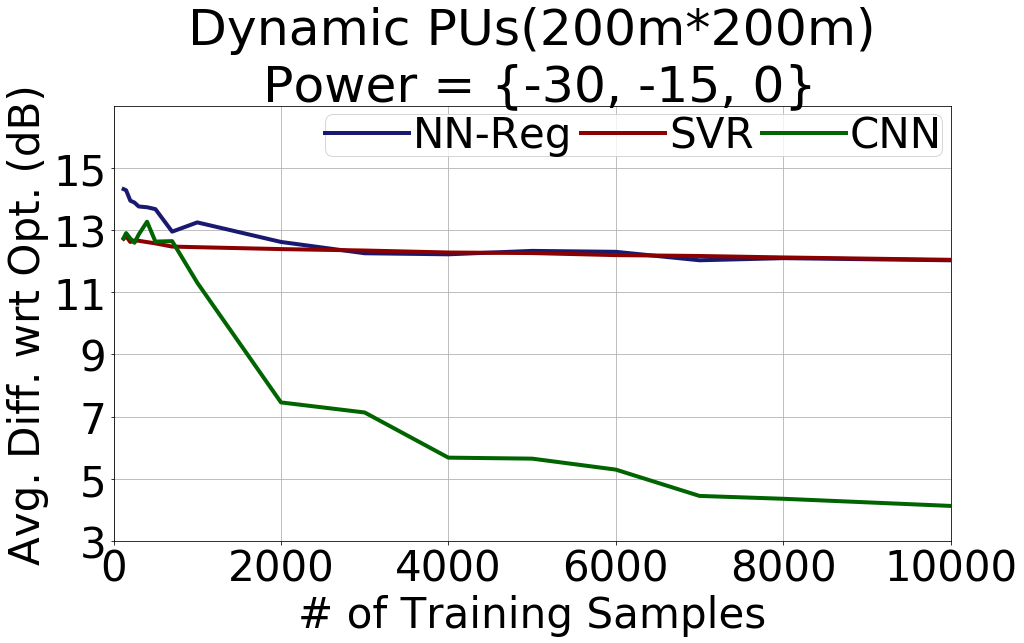

In [15]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 200*200, validation samples training/3, test samples 40k
# dynamic pus(power is from a set {0, -15, -30}),  field 200*200
# data_sets = {"dynamic_pus_using_pus50000_15PUs_201912_3000_40_200.dat", "dynamic_pus_max_power50000_15PUs_201912_3000_40_200.dat"}
# alpha = 5
# comparing CNN and previous machine learning algos.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 200, 200, 4, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 5
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 8001, 1000)) + [10000]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([14.321, 14.284, 13.95, 13.888, 13.763, 13.738, 13.677, 12.953, 13.25, 12.621, 12.257, 12.223, 12.333,
                     12.303, 12.031, 12.099, 12.03])
                
fp.append([6.656, 6.361, 6.727, 6.917, 7.211, 5.728, 7.483, 5.899, 7.02, 6.39, 6.662, 6.316, 6.434, 5.845, 6.359, 6.244, 6.056])

## SVR
average_diff.append([12.725, 12.808, 12.619, 12.669, 12.659, 12.616, 12.575, 12.472, 12.452, 12.391, 12.345, 12.281,
                     12.263, 12.197, 12.169, 12.122, 12.046])
fp.append([7.61, 7.091, 6.717, 7.164, 7.559, 7.319, 7.584, 7.632, 7.435, 7.599, 7.605, 7.624, 7.6, 7.533, 7.525, 7.48, 7.4])


## CNN
average_diff.append([12.742, 12.906, 12.731, 12.595, 12.859, 13.272, 12.632, 12.647, 11.309, 7.455, 7.131, 5.677, 5.645, 5.292, 
                     4.445, 4.353, 4.123])
fp.append([5.963, 5.861, 8.957, 8.821, 8.215, 9.518, 8.633, 6.644, 6.605, 3.919, 2.539, 3.866, 1.96, 2.717, 1.671, 3.0, 2.34])



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic PUs(200m*200m)\n Power = {-30, -15, 0}')
plt.grid(True)

ax.set_yticks(np.arange(3,17, 2))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([3, 17])
ax.set_xlim([0, 10000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML\\results\\dynamic_power_set_limited_PUs_200m.png', 
            bbox_inches = 'tight', pad_inches = 0)

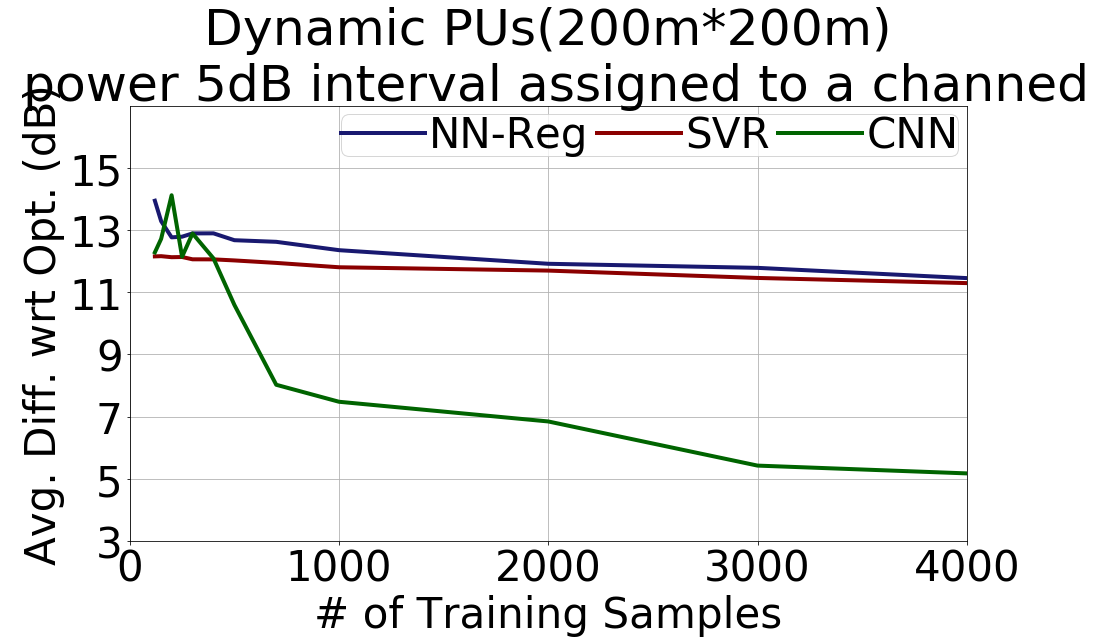

In [14]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 200*200, validation samples training/3, test samples 40k
# dynamic pus,  field 200*200
# data_sets = {"dynamic_pus_using_pus50000_9PUs_202001_1515_05_200.dat", 
#              "dynamic_pus_max_power50000_9PUs_202001_1515_05_200.dat"}
# alpha = 5
# comparing CNN and previous machine learning algos.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 200, 200, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 9, 'log', 5
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 4001, 1000))


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([13.948, 13.289, 12.769, 12.79, 12.896, 12.898, 12.677, 12.625, 12.356, 11.918, 11.787, 11.457])
                
fp.append([6.896, 4.973, 5.609, 5.648, 6.336, 6.268, 6.225, 6.223, 6.675, 6.286, 5.728, 6.007])

## SVR
average_diff.append([12.156, 12.163, 12.13, 12.136, 12.062, 12.06, 12.026, 11.946, 11.806, 11.699, 11.462, 11.296])
fp.append([7.411, 7.261, 7.241, 7.195, 7.052, 6.65, 6.827, 7.081, 7.089, 7.15, 7.011, 6.929])


## CNN
average_diff.append([12.285, 12.721, 14.125, 12.144, 12.894, 12.092, 10.594, 8.023, 7.476, 6.842, 5.421, 5.17])
fp.append([6.23, 7.457, 4.918, 6.048, 4.964, 6.133, 5.217, 4.322, 2.932, 2.747, 2.283, 2.585])



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic PUs(200m*200m)\n power 5dB interval assigned to a channel')
plt.grid(True)

ax.set_yticks(np.arange(3,17, 2))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([3, 17])
ax.set_xlim([0, 4000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML\\results\\dynamicPUs_200m.png', 
            bbox_inches = 'tight', pad_inches = 0)

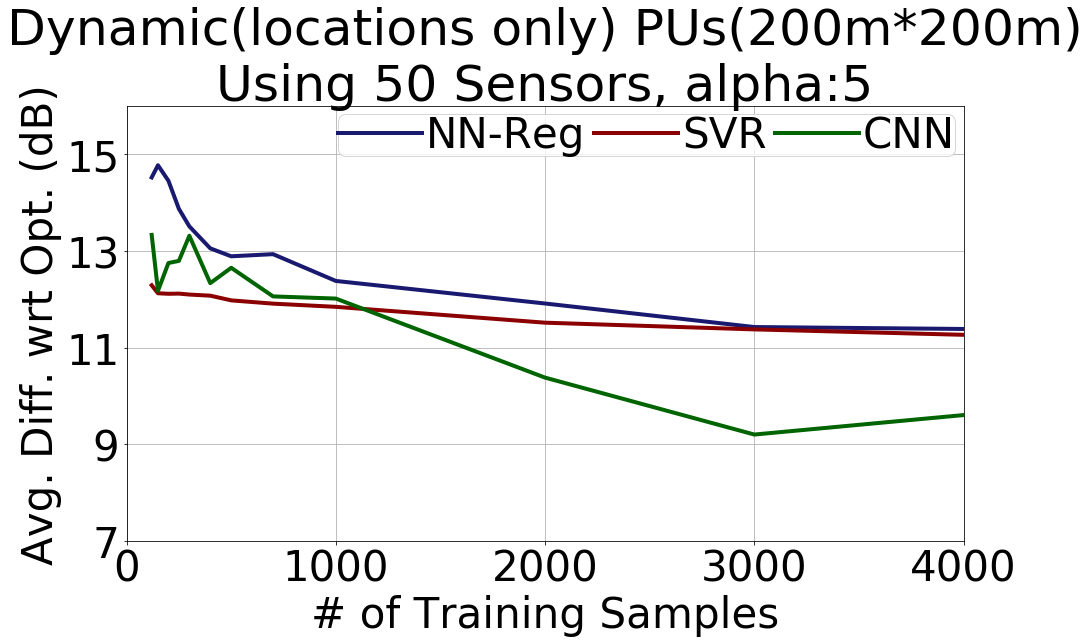

In [11]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 200*200, validation samples training/3, test samples 40k
# dynamic pus(power is fixed),  field 200*200
# data_sets = {"dynamic_pus_power_fixed_sensors_50000_9PUs_50sensors_202001_0516_08_200.dat", "dynamic_pus_power_fixed_max_power50000_9PUs_202001_0516_08_200.dat"}
# alpha = 5
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 200, 200, 6, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 4
# max_pu_power = -15
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 4001, 1000))


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([14.52, 14.772, 14.451, 13.87, 13.507, 13.052, 12.888, 12.932, 12.378, 11.911, 11.424, 11.384])
                
fp.append([4.598, 6.23, 6.095, 6.128, 6.333, 5.818, 5.83, 6.477, 6.332, 6.346, 6.025, 5.808])

## SVR
average_diff.append([12.288, 12.123, 12.112, 12.116, 12.096, 12.073, 11.976, 11.908, 11.842, 11.514, 11.375, 11.263])
fp.append([6.214, 6.993, 6.94, 6.713, 6.84, 6.57, 6.794, 6.731, 6.878, 7.081, 7.045, 7.121])


## CNN
average_diff.append([13.331, 12.173, 12.749, 12.793, 13.313, 12.332, 12.65, 12.058, 12.013, 10.377, 9.199, 9.602])
fp.append([5.105, 7.282, 5.684, 5.915, 6.261, 6.352, 5.684, 7.614, 7.72, 6.601, 6.255, 5.281])



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic(locations only) PUs(200m*200m)\nUsing 50 Sensors, alpha:5')
plt.grid(True)

ax.set_yticks(np.arange(7,16, 2))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([7, 16])
ax.set_xlim([0, 4000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML\\results\\Changing_locationPUs_50sensors_200m_alpha_5.png', 
            bbox_inches = 'tight', pad_inches = 0)

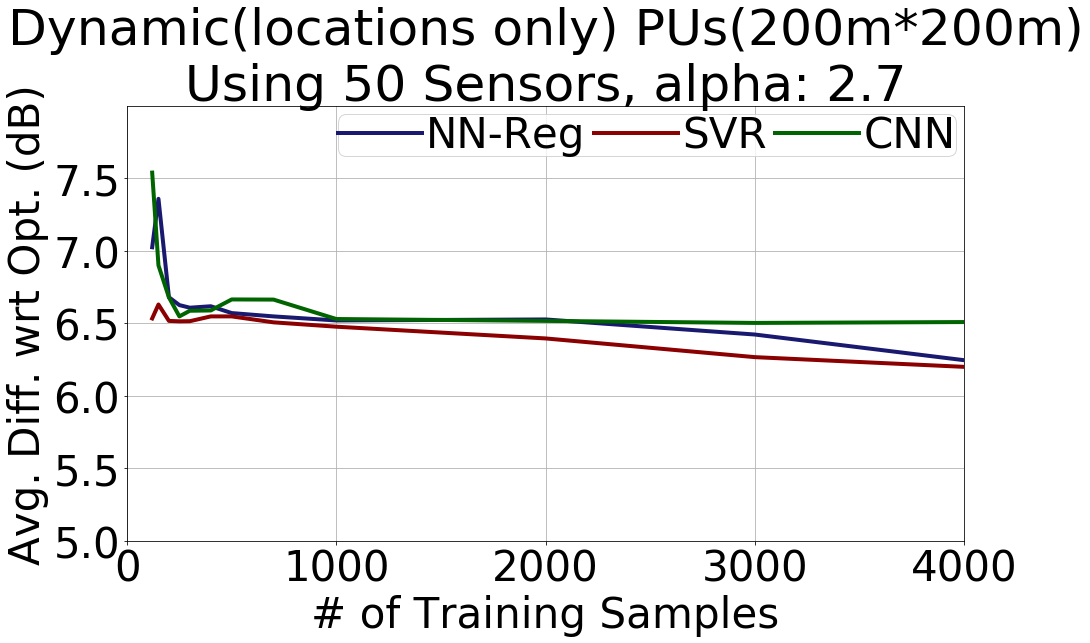

In [7]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 200*200, validation samples training/3, test samples 40k
# dynamic pus(power is fixed),  field 200*200
# data_sets = {"dynamic_pus_power_fixed_sensors_50000_9PUs_100sensors_202001_0613_23_200_alpha2_7.dat", "dynamic_pus_power_fixed_max_power50000_9PUs_202001_0613_23_200_alpha2_7.dat"}
# alpha = 2.7
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 200, 200, 5, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 2
# max_pu_power = -50
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 4001, 1000))


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([7.025, 7.359, 6.68, 6.626, 6.608, 6.618, 6.571, 6.548, 6.52, 6.527, 6.423, 6.246])            
fp.append([4.807, 3.969, 4.599, 4.577, 3.875, 3.673, 3.806, 3.727, 3.819, 4.221, 3.006, 3.098])

## SVR
average_diff.append([6.534, 6.63, 6.517, 6.514, 6.515, 6.548, 6.548, 6.507, 6.477, 6.396, 6.267, 6.2])
fp.append([4.274, 3.887, 3.896, 4.053, 3.921, 3.77, 3.727, 3.863, 3.796, 3.892, 3.848, 3.829])


## CNN
average_diff.append([7.54, 6.9, 6.679, 6.548, 6.587, 6.589, 6.665, 6.664, 6.53, 6.517, 6.503, 6.509])
fp.append([2.197, 2.783, 3.509, 4.405, 3.455, 3.943, 4.323, 3.302, 3.923, 3.867, 3.757, 3.628])



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic(locations only) PUs(200m*200m)\nUsing 50 Sensors, alpha: 2.7')
plt.grid(True)

ax.set_yticks(np.arange(5, 8, 0.5))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([5, 8])
ax.set_xlim([0, 4000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML\\results\\Changing_locationPUs_50sensors_200m_alpha2_7.png', 
            bbox_inches = 'tight', pad_inches = 0)

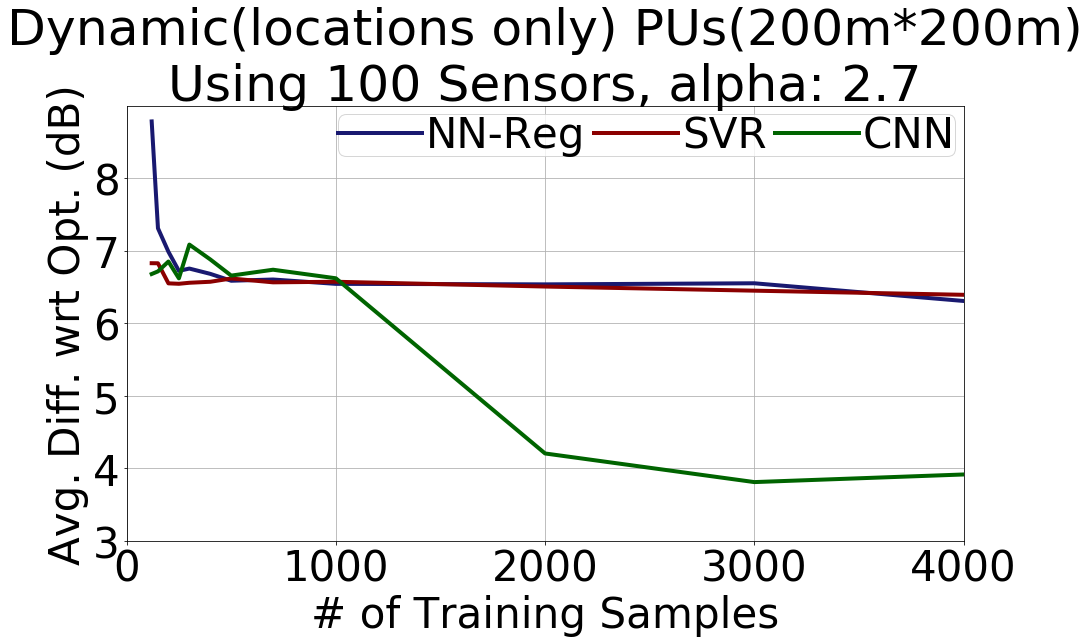

In [9]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 200*200, validation samples training/3, test samples 40k
# dynamic pus(power is fixed),  field 200*200
# data_sets = {"dynamic_pus_power_fixed_sensors_50000_9PUs_100sensors_202001_0613_23_200_alpha2_7.dat",
# "dynamic_pus_power_fixed_max_power50000_9PUs_202001_0613_23_200_alpha2_7.dat"}
# alpha = 2.7
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 200, 200, 5, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 2
# max_pu_power = -50
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 4001, 1000))


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([8.786, 7.312, 6.988, 6.724, 6.756, 6.683, 6.588, 6.605, 6.545, 6.538, 6.553, 6.309])            
fp.append([5.904, 5.537, 4.93, 4.449, 4.873, 4.784, 4.384, 4.548, 4.114, 3.968, 3.754, 3.301])

## SVR
average_diff.append([6.83, 6.829, 6.552, 6.546, 6.56, 6.574, 6.619, 6.566, 6.574, 6.508, 6.451, 6.394])
fp.append([3.989, 3.868, 4.306, 4.259, 4.349, 4.394, 4.65, 4.381, 4.419, 4.188, 4.061, 3.98])


## CNN
average_diff.append([6.681, 6.717, 6.853, 6.621, 7.087, 6.882, 6.659, 6.74, 6.622, 4.205, 3.81, 3.915])
fp.append([4.217, 4.355, 4.336, 4.126, 5.062, 5.203, 3.457, 4.974, 3.995, 2.65, 2.115, 1.553])



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic(locations only) PUs(200m*200m)\nUsing 100 Sensors, alpha: 2.7')
plt.grid(True)

ax.set_yticks(np.arange(3, 9, 1))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([3, 9])
ax.set_xlim([0, 4000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML\\results\\Changing_locationPUs_100sensors_200m_alpha2_7.png', 
            bbox_inches = 'tight', pad_inches = 0)

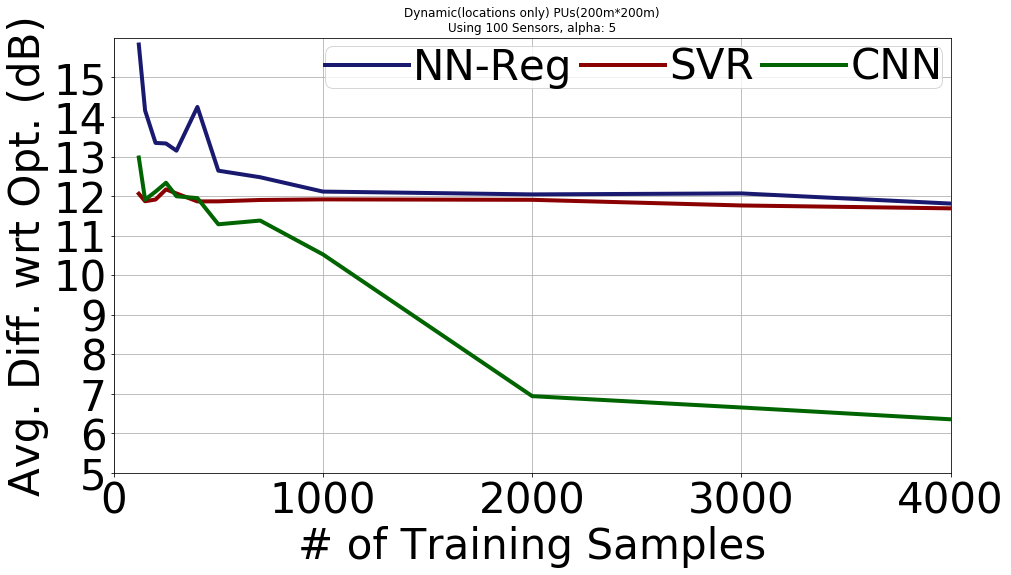

In [4]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 200*200, validation samples training/3, test samples 40k
# dynamic pus(power is fixed),  field 200*200
# data_sets = {"dynamic_pus_power_fixed_sensors_50000_9PUs_100sensors_202001_0613_23_200_alpha2_7.dat", "dynamic_pus_power_fixed_max_power50000_9PUs_202001_0613_23_200_alpha2_7.dat"}
# alpha = 5
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 200, 200, 5, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 2
# max_pu_power = -15
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 4001, 1000))


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([15.833, 14.163, 13.344, 13.33, 13.148, 14.254, 12.642, 12.476, 12.113, 12.042, 12.067, 11.81])            
fp.append([7.345, 6.27, 5.583, 5.287, 5.246, 7.507, 6.082, 5.927, 6.372, 6.054, 5.949, 5.942])

## SVR
average_diff.append([12.059, 11.869, 11.912, 12.169, 12.066, 11.865, 11.866, 11.901, 11.916, 11.905, 11.762, 11.689])
fp.append([8.138, 7.44, 7.495, 7.841, 7.543, 7.113, 7.443, 7.514, 7.402, 7.259, 7.173, 7.257])


## CNN
average_diff.append([12.975, 11.909, 12.113, 12.337, 11.995, 11.948, 11.286, 11.38, 10.524, 6.939, 6.652, 6.353])
fp.append([4.604, 7.292, 8.69, 7.889, 6.814, 8.315, 6.737, 6.351, 4.141, 3.613, 3.124, 3.819])



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic(locations only) PUs(200m*200m)\nUsing 100 Sensors, alpha: 5')
plt.grid(True)

ax.set_yticks(np.arange(5, 16, 1))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([5, 16])
ax.set_xlim([0, 4000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML\\results\\Changing_locationPUs_100sensors_200m_alpha5.png', 
            bbox_inches = 'tight', pad_inches = 0)

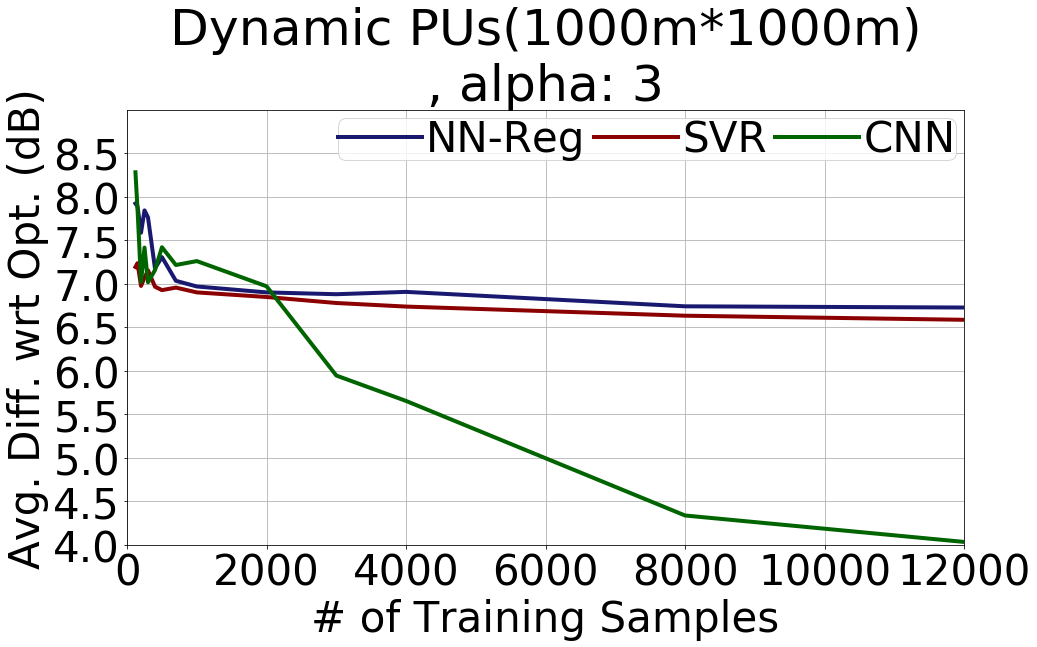

In [16]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus,  field 1000*1000
# data_sets = {"dynamic_pus_using_pus50000_15PUs_201912_2219_10_1k.dat", "dynamic_pus_max_power50000_15PUs_201912_2219_10_1k.dat"}
# alpha = 5
# comparing CNN and previous machine learning algos using sensor readings.

# alidation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 4
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
# sensors = False
# max_pu_power = 0
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 4001, 1000)) + [8000, 12000]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([7.924, 7.889, 7.588, 7.845, 7.764, 7.179, 7.308, 7.035, 6.97, 6.902, 6.881, 6.908, 6.742, 6.728])          
fp.append([3.368, 3.33, 3.261, 3.529, 3.966, 3.347, 3.662, 3.693, 3.738, 3.625, 3.764, 3.583, 3.145, 3.41])

## SVR
average_diff.append([7.194, 7.238, 6.976, 7.072, 7.155, 6.968, 6.928, 6.957, 6.902, 6.849, 6.78, 6.739, 6.634, 6.587])
fp.append([4.856, 4.72, 4.349, 4.287, 4.476, 4.273, 4.25, 4.336, 4.16, 4.155, 4.116, 4.101, 4.032, 4.032]) 



## CNN
average_diff.append([8.283, 7.856, 7.021, 7.417, 7.018, 7.159, 7.421, 7.217, 7.262, 6.972, 5.946, 5.174, 4.337, 4.033])
fp.append([4.156, 5.359, 3.604, 5.755, 4.308, 2.779, 3.967, 4.583, 3.734, 4.682, 2.438, 4.167, 2.794, 2.492]) 



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(4, 9, 0.5))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([4, 9])
ax.set_xlim([0, 12000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_PUs_1000m_alpha3.png', 
            bbox_inches = 'tight', pad_inches = 0)

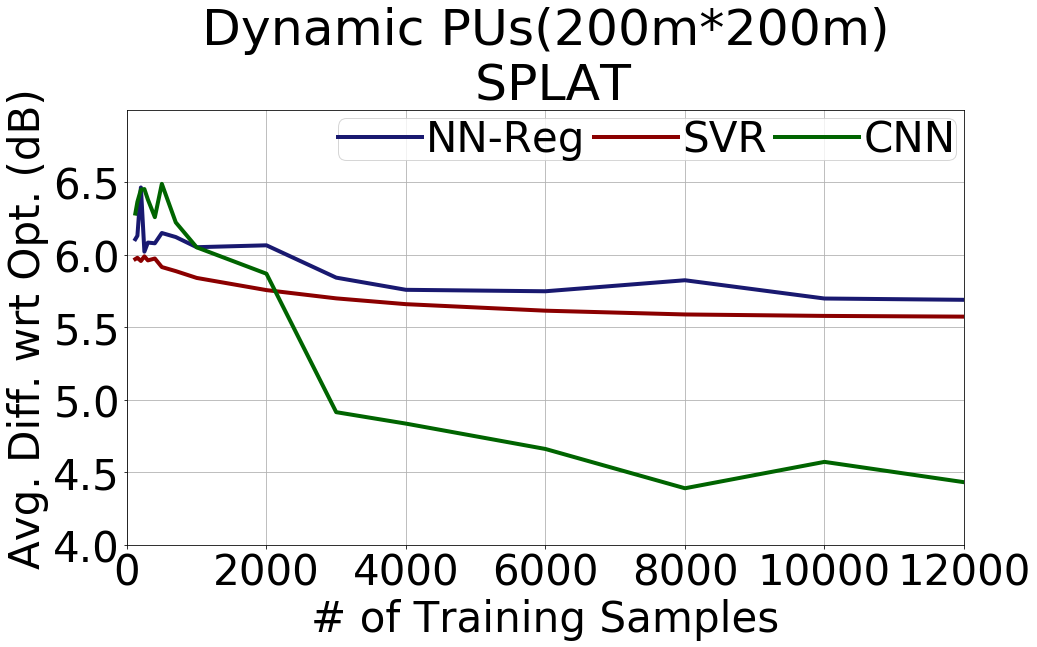

In [4]:
### MAX_POWER ANAlysis
## SPLAT
# field 200*200, validation samples training/3, test samples ~30k
# dynamic pus,  field 200*200
# splat_left_upper_ref = (40.800595, 73.107507)
# tx_height, rx_height = 30, 15
# data_sets = {"dynamic_pus_using_pus_50000_10PUs_200grid_splat_202001_3100_42.txt", 
#              "dynamic_pus_max_power50000_10PUs_200grid_splat_202001_3100_42.txt"}
# cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 200, 200, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 10, 'log', 5  # 'log', 'linear'
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
# sensors = False
# max_pu_power = 0
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 4001, 1000)) + [6000, 8000, 10000,
                                                                                               12000]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([6.108, 6.132, 6.465, 6.022, 6.085, 6.08, 6.151, 6.123, 6.053, 6.066, 5.843, 5.759,
                     5.749, 5.825, 5.699, 5.69])          
fp.append([3.227, 3.14, 3.649, 3.261, 3.044, 2.985, 2.824, 3.06, 2.869, 3.177, 3.29, 3.186, 3.019, 2.818,
           3.164, 2.977])

## SVR
average_diff.append([5.971, 5.98, 5.958, 5.99, 5.962, 5.975, 5.916, 5.888, 5.841, 5.757, 5.7, 5.66, 
                    5.615, 5.589, 5.579, 5.574])
fp.append([3.943, 3.784, 3.676, 3.869, 3.85, 3.789, 3.756, 3.623, 3.589, 3.6, 3.655, 3.654, 3.64, 
           3.635, 3.661, 3.629]) 



## CNN
average_diff.append([6.285, 6.366, 6.45, 6.454, 6.382, 6.26, 6.49, 6.224, 6.052, 5.87, 4.915, 4.836, 4.661, 
                     4.39, 4.572, 4.432])
fp.append([3.612, 3.605, 3.699, 3.594, 4.263, 2.916, 3.756, 3.587, 2.819, 3.215, 3.294, 2.149, 3.415, 
           2.428, 2.803, 2.471]) 
# for 12 epoches and 15 filters
# [6.59, 6.676, 6.716, 6.614, 6.352, 6.79, 6.849, 6.845, 6.267, 5.774, 4.888, 4.533]
# [3.82, 3.625, 3.975, 3.738, 3.175, 3.133, 3.323, 3.283, 2.96, 3.234, 2.388, 2.447]

# for 6 epoches and 15 filters
# [6.488, 6.389, 6.235, 6.186, 6.113, 6.373, 6.139, 6.231, 6.059, 6.049, 5.07, 5.397]
# [3.063, 3.262, 2.961, 4.066, 3.081, 2.838, 3.358, 4.318, 4.086, 3.286, 2.011, 3.543]

# for 12 epochs and 10 filter
# [7.146, 6.657, 6.888, 6.659, 6.466, 6.916, 6.981, 6.729, 6.714, 5.37, 4.673, 4.611]
# [4.596, 3.707, 3.526, 3.973, 3.809, 2.937, 3.178, 3.34, 3.926, 2.335, 2.623, 2.174]



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic PUs(200m*200m)\n SPLAT')
plt.grid(True)

ax.set_yticks(np.arange(4, 7, 0.5))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([4, 7])
ax.set_xlim([0, 12000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_PUs_200_SPLAT.png', 
            bbox_inches = 'tight', pad_inches = 0)

In [ ]:
### MAX_POWER ANAlysis
#variable training samples, with noise(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus,  field 1000*1000
# data_sets = {"dynamic_pus_using_pus_50000_15PUs_1000grid_log_noisy_std1_202003_0702_12.dat", 
# "dynamic_pus_max_power_50000_15PUs_1000grid_1cell_log_noisy_std1_202003_0702_12.dat"}
# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 4  # 'log', 'linear'
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
training_samples = [256, 512, 1024, 2048, 4096, 8192, 12288] 


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append()          
fp.append()

## SVR
average_diff.append()
fp.append() 



## CNN
average_diff.append([7.379, 7.262, 7.951, 7.413, 7.199, 4.678, 3.476, 2.875])
fp.append([3.049, 4.539, 6.467, 3.812, 3.872, 3.178, 1.781, 1.543]) 




line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(4, 9, 0.5))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([4, 9])
ax.set_xlim([0, 12000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_PUs_1000m_alpha3.png', 
            bbox_inches = 'tight', pad_inches = 0)

In [ ]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus,  field 1000*1000
# data_sets = {"dynamic_pus_sensors_50000_15PUs_200sensors_1000grid_1cell_log_noisy_std1_202003_0702_12.dat", 
# "dynamic_pus_max_power_50000_15PUs_1000grid_1cell_log_noisy_std1_202003_0702_12.dat"}
# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 3  # 'log', 'linear'
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# if sensors:
#     sensors_num = 200
#     sensors_file_path = "rsc/sensors/" + str(max(max_x, max_y)) + "/" + str(sensors_num) + "/sensors"
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 4001, 1000)) + [8000, 12000]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append()          
fp.append()

## SVR
average_diff.append()
fp.append() 



## CNN
average_diff.append([7.067, 7.053, 7.251, 7.435, 7.64, 7.015, 7.632, 7.662, 7.973, 7.89, 7.678, 8.187, 7.107, 7.171])
fp.append([4.026, 4.181, 3.78, 3.143, 2.723, 4.151, 5.396, 4.583, 3.43, 4.82, 3.013, 3.665, 3.554, 3.492]) 



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(4, 9, 0.5))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([4, 9])
ax.set_xlim([0, 12000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_PUs_1000m_alpha3.png', 
            bbox_inches = 'tight', pad_inches = 0)

Real results

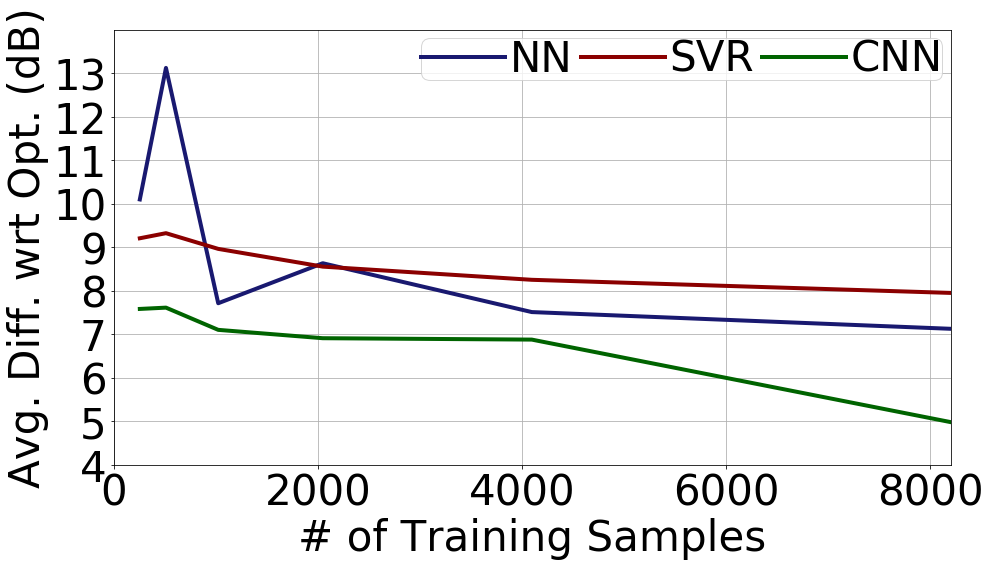

In [9]:
### MAX_POWER ANAlysis
#variable training samples, with noise(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus,  field 1000*1000
# data_sets = {"dynamic_pus_sensors_50000_15PUs_3000sensors_1000grid_1cell_log_noisy_std1_202003_2422_52.dat", 
# "dynamic_pus_max_power_50000_15PUs_1000grid_1cell_log_noisy_std1_202003_2422_52.dat"}
# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 3  # 'log', 'linear'
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# if sensors:
#     sensors_num = 3000
#     sensors_file_path = "rsc/sensors/" + str(max(max_x, max_y)) + "/" + str(sensors_num) + "/sensors"
average_diff = []
fp = []
training_samples = [256, 512, 1024, 2048, 4096, 8192]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([10.102, 13.127, 7.715, 8.635, 7.512, 7.128])          
fp.append([1.589, 1.024, 5.997, 7.564, 5.555, 4.366])
# best lambda = [0, 1, 1, 0.01, 0.1, 1]

## SVR
average_diff.append([9.209, 9.326, 8.965, 8.557, 8.254, 7.953])
fp.append([4.871, 3.968, 3.921, 4.092, 4.152, 4.224])



## CNN
average_diff.append([7.584, 7.614, 7.103, 6.911, 6.879, 4.985])
fp.append([3.698, 5.935, 3.147, 4.451, 3.843, 2.699]) 



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
# plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(4, 14, 1))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([4, 14])
ax.set_xlim([0, 8200])
plt.legend([ 'NN', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_15PUs_1000m_alpha3_noise1_1000grid_1cell.png', 
            bbox_inches = 'tight', pad_inches = 0)

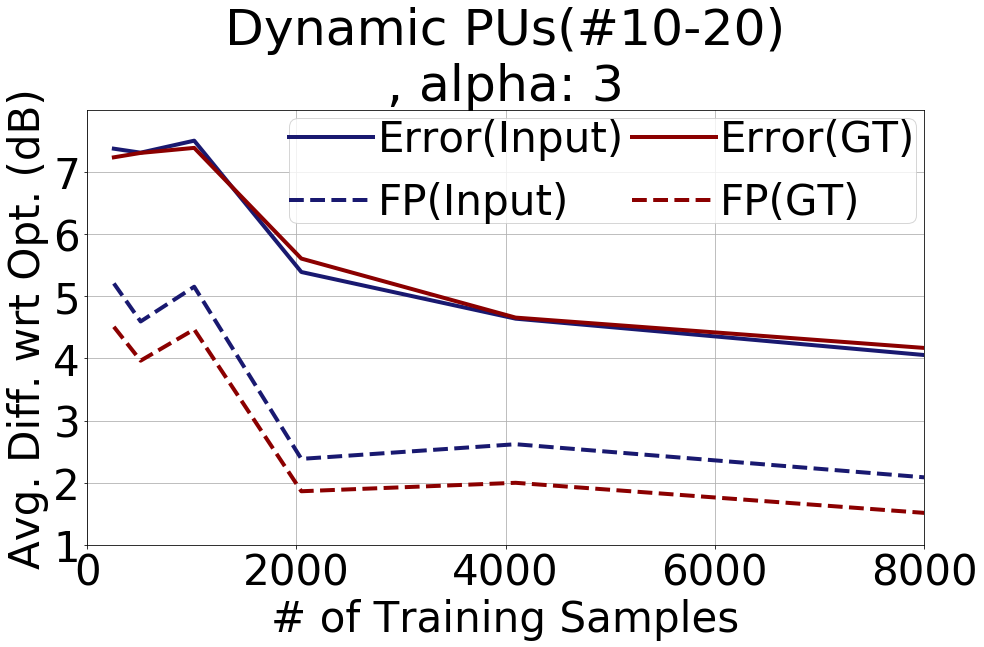

In [6]:
### MAX_POWER ANAlysis, Conservative Model
#variable training samples, noisy(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 1000*1000
# data_sets = {"dynamic_pus_using_pus_50000_min10_max20PUs_1SUs_1000grid_log_noisy_std1_202005_0400_37.dat", 
# "dynamic_pus_max_power_50000_min10_max20PUs_1SUs_1000grid_log_noisy_std1_202005_0400_37.dat"}
# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

# number_samples = [256, 512, 1024, 2048, 4096, 8192] 
# # number_samples = [4096, 8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 4  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
average_diff_cons = []
fp_cons = []
training_samples = [256, 512, 1024, 2048, 4096, 8192] 


## LR
# average_diff.append([])

# fp.append([])


## NN    
# average_diff.append()          
# fp.append()

# ## SVR
# average_diff.append()
# fp.append() 



## CNN
average_diff.append([7.376, 7.312, 7.505, 5.391, 4.64, 4.026])
fp.append([5.207, 4.595, 5.154, 2.383, 2.619, 2.06])
average_diff_cons.append([7.237, 7.308, 7.389, 5.607, 4.657, 4.145])
fp_cons.append([4.509, 3.964, 4.467, 1.862, 1.998, 1.49])
# best_lambda = [1, 1, 0.1, 0.001]





line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, fp[0], color='midnightblue', linewidth=line_width,
         markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_diff_cons[0], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, fp_cons[0], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=class_reg)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic PUs(#10-20)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(1, 8, 1))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([1, 8])
ax.set_xlim([0, 8000])
plt.legend([ 'Error(Input)', 'FP(Input)', 'Error(GT)', 'FP(GT)'], ncol=2, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/dynamic_pus_numpus_10_20_alpha3_grid1000_conserve.png', 
            bbox_inches = 'tight', pad_inches = 0)

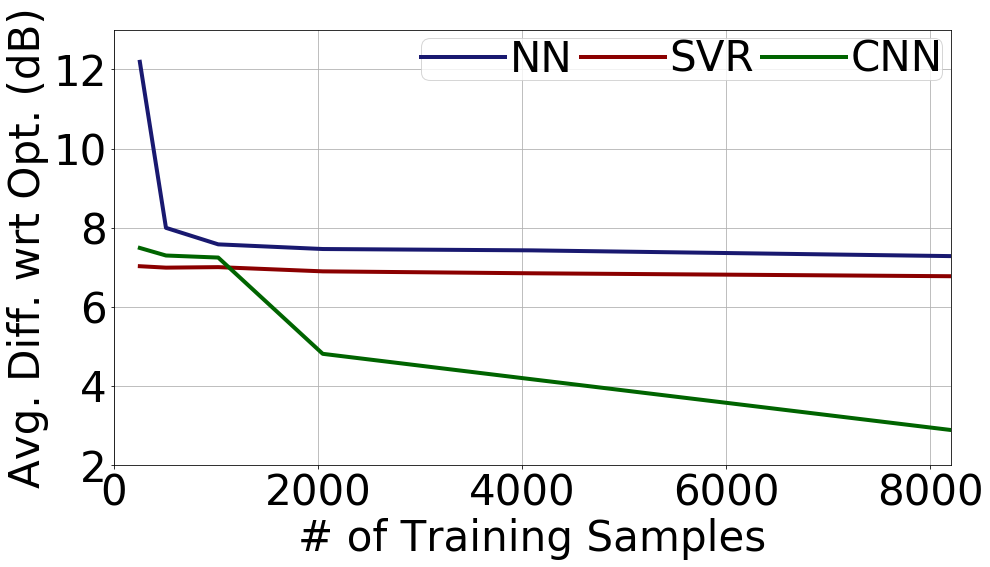

In [14]:
### MAX_POWER ANAlysis
#variable training samples, noisy(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 1000*1000
# data_sets = {
# "dynamic_pus_using_pus_50000_min10_max20PUs_1SUs_1000grid_log_noisy_std1_202004_0116_48.txt", 
# "dynamic_pus_max_power_50000_min10_max20PUs_1SUs_1000grid_1cell_log_noisy_std1_202004_0116_48.txt"}
# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# max_pus_num, intensity_degradation, slope = 20, 'log', 4  # 'log', 'linear'
# max_sus_num = 1
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
training_samples = [256, 512, 1024, 2048, 4096, 8192] 


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([12.193, 7.994, 7.576, 7.458, 7.424, 7.279])          
fp.append([1.617, 3.816, 3.336, 2.981, 2.83, 2.715])
#best lambda:  [0, 0.01, 0, 0, 0.01, 0.01]

## SVR
average_diff.append([7.023, 6.987, 7.0, 6.893, 6.844, 6.77])
fp.append([4.469, 4.027, 3.999, 4.047, 4.016, 4.014])



## CNN
average_diff.append([7.485, 7.294, 7.242,4.807, 4.164, 2.883])
fp.append([2.938, 4.496, 4.267, 2.333, 2.16, 1.478]) 




line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
# plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(2, 13, 2))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([2, 13])
ax.set_xlim([0, 8200])
plt.legend([ 'NN', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_10_20PUs_1000m_alpha3_noise1_1000grid_1cell.png', 
            bbox_inches = 'tight', pad_inches = 0)

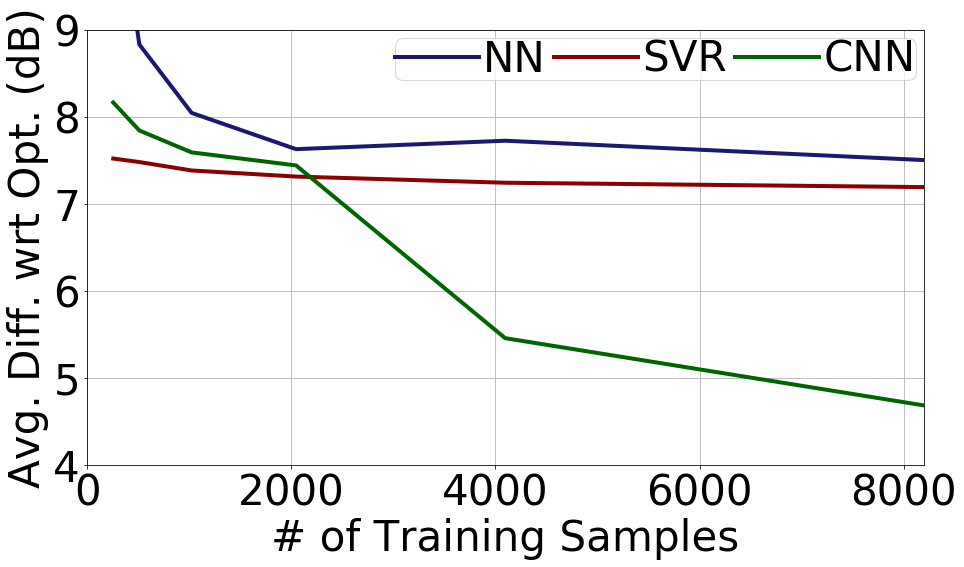

In [16]:
### MAX_POWER ANAlysis
#variable training samples, noisy(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 1000*1000
# data_sets = {"dynamic_pus_using_pus_100000_min10_max20PUs_min1_max4SUs_1000grid_log_noisy_std1_202004_0421_50.dat", 
# "dynamic_pus_max_power_100000_min10_max20PUs_min1_max4SUs_1000grid_1cell_log_noisy_std1_202004_0421_50.dat"}
# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# max_pus_num, intensity_degradation, slope = 20, 'log', 4  # 'log', 'linear'
# max_sus_num = 4
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
training_samples = [256, 512, 1024, 2048, 4096, 8192] 


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([10.908, 8.833, 8.046, 7.629, 7.726, 7.504])          
fp.append([2.03, 2.923, 3.272, 3.405, 3.215, 3.303])
# best lambda:  [0.01, 0.1, 0.001, 0.001, 0.001, 0]

## SVR
average_diff.append([7.521, 7.481, 7.384, 7.314, 7.243, 7.193])
fp.append([4.623, 4.406, 4.425, 4.357, 4.404, 4.448]) 



## CNN
average_diff.append([8.166, 7.844, 7.592, 7.442, 5.456, 4.684])
fp.append([4.56, 4.42, 4.37, 4.259, 2.751, 2.624]) 




line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
# plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(4, 11, 1))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([4, 9])
ax.set_xlim([0, 8200])
plt.legend([ 'NN', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_10_20PUs_1_4SUs_1000m_alpha3_noise1_1000grid_1cell.png', 
            bbox_inches = 'tight', pad_inches = 0)

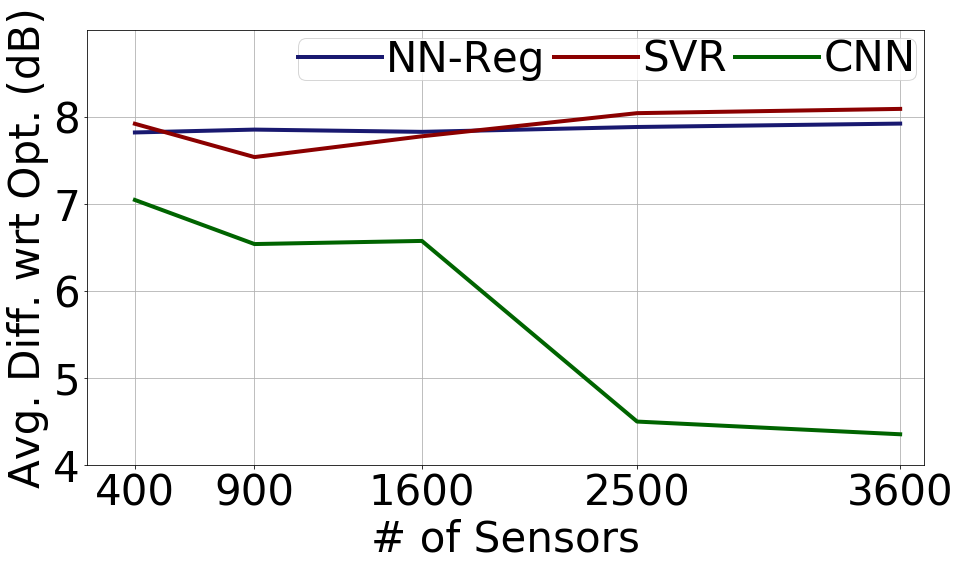

In [23]:
### MAX_POWER ANAlysis, Effect of sensor density, Training Set is 8K
#variable training samples, noisy(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 1000*1000
# data_sets = {
# "",
# "",
# "dynamic_pus_sensors_50000_min10_max20PUs_1SUs_900sensors_1000grid_1cell_log_noisy_std1_202004_0812_44.txt",
# "dynamic_pus_max_power_50000_min10_max20PUs_1SUs_1000grid_1cell_log_noisy_std1_202004_0812_44.txt",
# "dynamic_pus_sensors_50000_min10_max20PUs_1SUs_1600sensors_1000grid_1cell_log_noisy_std1_202004_0921_27.txt",
# "dynamic_pus_max_power_50000_min10_max20PUs_1SUs_1000grid_1cell_log_noisy_std1_202004_0921_27.txt",
# "dynamic_pus_sensors_50000_min10_max20PUs_1SUs_2500sensors_1000grid_1cell_log_noisy_std1_202004_1114_51.txt",
# "dynamic_pus_max_power_50000_min10_max20PUs_1SUs_1000grid_1cell_log_noisy_std1_202004_1114_51.txt",
# "dynamic_pus_sensors_50000_min10_max20PUs_1SUs_3600sensors_1000grid_1cell_log_noisy_std1_202004_1304_36.txt",
# "dynamic_pus_max_power_50000_min10_max20PUs_1SUs_1000grid_1cell_log_noisy_std1_202004_1304_36.txt"}
# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 3  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# if sensors:
#     sensors_num = [400, 900, 1600, 2500, 3600]


# sensors = True
average_diff = []
fp = []
sensor_numbers = [400, 900, 1600, 2500, 3600] 
training_samples = sensor_numbers


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([7.821, 7.854, 7.828, 7.884, 7.923])
fp.append([3.652, 3.403, 3.742, 3.592, 3.621])
# best_lambda = [1, 1, 1]

## SVR
average_diff.append([7.921, 7.538, 7.777, 8.043, 8.092])
fp.append([4.231, 4.099, 4.184, 4.36, 4.41]) 



## CNN
average_diff.append([7.045, 6.538, 6.574, 4.497, 4.351])
fp.append([3.831, 3.696, 4.082, 2.103, 1.843]) 




line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Sensors', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
# plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3, \n changing number of sensors')
plt.grid(True)

ax.set_yticks(np.arange(4, 9, 1))
ax.set_xticks([400, 900, 1600, 2500, 3600])
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([4, 9])
ax.set_xlim([200, 3700])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_10_20PUs_1000m_alpha3_noise1_1000grid_1cell_changing_number_sensors.png', 
            bbox_inches = 'tight', pad_inches = 0)

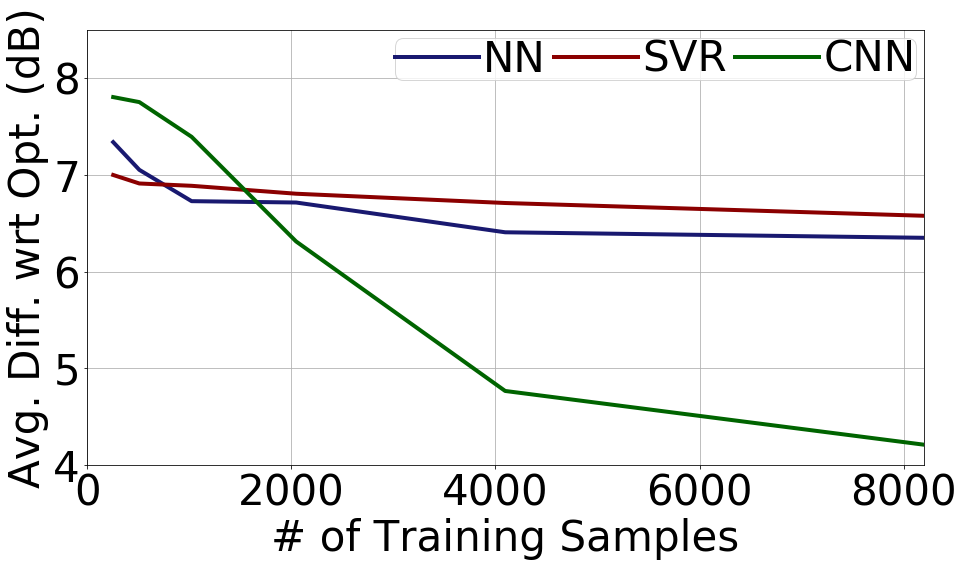

In [28]:
# SPLAT
### MAX_POWER ANAlysis, Effect of training set
#variable training samples, , field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {"dynamic_pus_using_pus_60000_15PUs_1SUs_square100grid_splat_2020_06_17_21_46.txt",
#"dynamic_pus_max_power_60000_15PUs_1SUs_square100grid_splat_2020_06_17_21_46.txt"}
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 15, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
training_samples = [256, 512, 1024, 2048, 4096, 8192] 


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([7.339, 7.052, 6.728, 6.714, 6.406, 6.349])          
fp.append([3.105, 2.762, 3.661, 3.839, 3.09, 3.136])

## SVR
average_diff.append([6.999, 6.911, 6.887, 6.805, 6.709, 6.577])
fp.append([3.745, 3.459, 3.458, 3.349, 3.438, 3.401]) 



## CNN
average_diff.append([7.805, 7.753, 7.394, 6.311, 4.764, 4.209])
fp.append([1.446, 1.959, 1.588, 2.387, 2.03, 2.453]) 
#best_lambda = [0.01, 0.001, 0, 0.001, 0.01, 0]




line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
# plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(4, 9, 1))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([4, 8.5])
ax.set_xlim([0, 8200])
plt.legend([ 'NN', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_15PUs_splat_100grid_10cell.png', 
            bbox_inches = 'tight', pad_inches = 0)

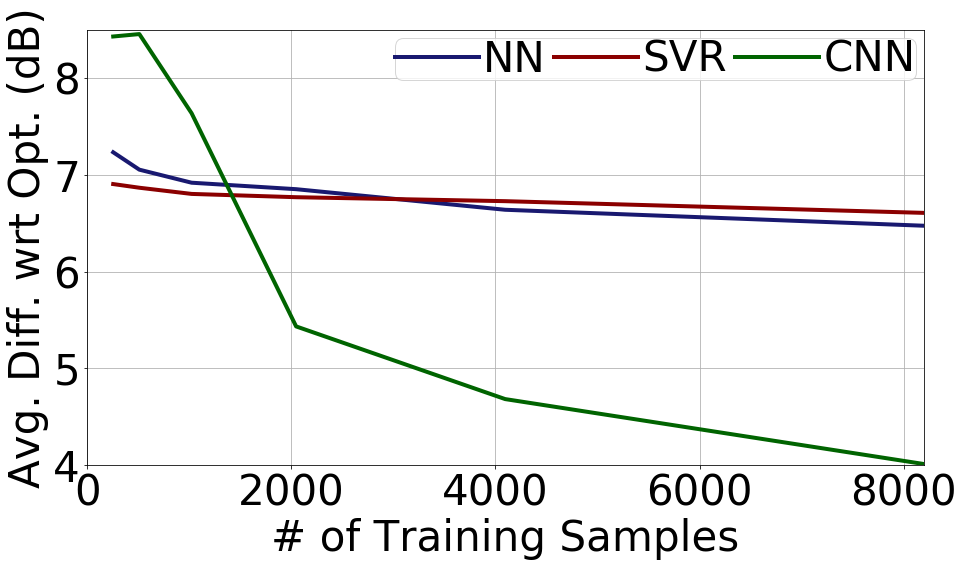

In [30]:
# SPLAT
### MAX_POWER ANAlysis, Effect of changing number of PUs
#variable training samples, , field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {"dynamic_pus_using_pus_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_23_18.txt",
#"dynamic_pus_max_power_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_23_18.txt"}
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 15, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
training_samples = [256, 512, 1024, 2048, 4096, 8192] 


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([7.234, 7.054, 6.919, 6.852, 6.639, 6.474])          
fp.append([3.427, 3.319, 3.336, 3.254, 3.096, 3.184])

## SVR
average_diff.append([6.905, 6.867, 6.803, 6.769, 6.728, 6.607])
fp.append([3.3, 3.223, 3.399, 3.284, 3.185, 3.195]) 




## CNN
average_diff.append([8.432, 8.457, 7.638, 5.432, 4.68, 4.009])
fp.append([1.326, 1.331, 2.526, 2.467, 2.412, 2.413]) 
#best_lambda = [0.01, 0.01, 0, 0.001, 0, 0.001]




line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
# plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(4, 9, 1))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([4, 8.5])
ax.set_xlim([0, 8200])
plt.legend([ 'NN', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_10_20PUs_splat_100grid_10cell.png', 
            bbox_inches = 'tight', pad_inches = 0)

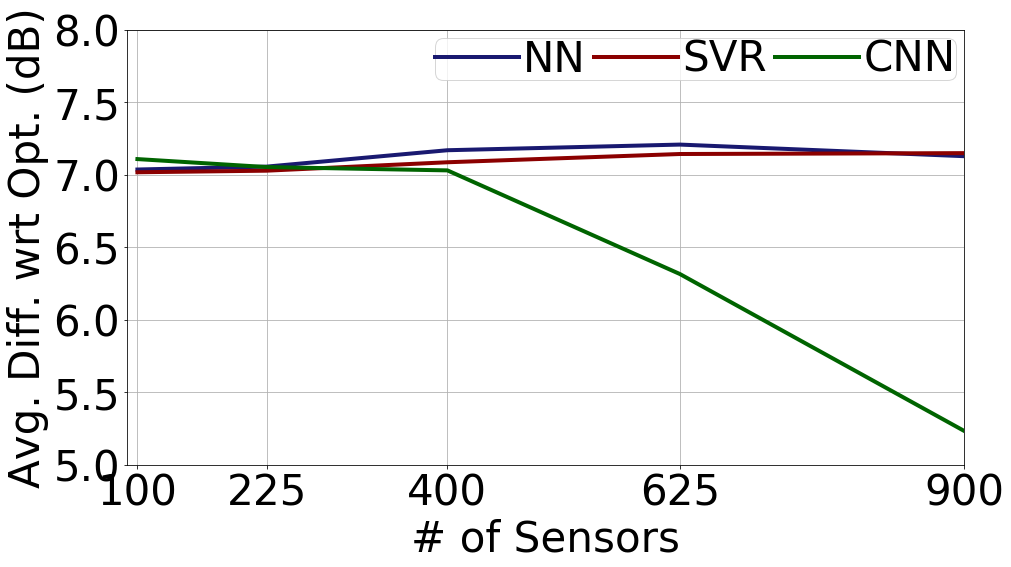

In [52]:
#Splat
### MAX_POWER ANAlysis, Effect of sensor density, Training Set is 8K
#variable training samples,  field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {
#"dynamic_pus_100sensor_60000_min10_max20PUs_1SUs_square100grid_splat_2020_06_19_00_36.txt", 
#"dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square100grid_splat_2020_06_19_00_36.txt",
#"dynamic_pus_225sensor_60000_min10_max20PUs_1SUs_square100grid_splat_2020_06_19_00_46.txt",
#"dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square100grid_splat_2020_06_19_00_46.txt",
#"dynamic_pus_400sensor_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_13_03.txt",
#"dynamic_pus_max_power_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_13_03.txt",
#"dynamic_pus_625sensor_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_14_20.txt",
#"dynamic_pus_max_power_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_14_20.txt",
#"dynamic_pus_900sensor_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_15_12.txt",
#"dynamic_pus_max_power_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_15_12.txt"}
# 
# comparing CNN and previous machine learning algos using sensor readings.

number_samples = [8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 4  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# if sensors:
#     sensors_num = 100
#     sensors_file_path = "../../../java_workspace/research/commons/resources/sensors/square" \
#     + str(max(max_x, max_y)) + "/" + str(sensors_num) + "/sensors.txt"


# sensors = True
average_diff = []
fp = []
sensor_numbers = [100, 225, 400, 625, 900] 
training_samples = sensor_numbers


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([7.037, 7.057, 7.17, 7.209, 7.129])          
fp.append([3.577, 3.526, 3.482, 3.438, 3.36])
# best_lambda = [1, 1, 1, 0.1, 0]

## SVR
average_diff.append([7.018, 7.029, 7.087, 7.144, 7.15])
fp.append([3.422, 3.266, 3.472, 3.536, 3.538])



## CNN
# average_diff.append([7.109, 7.054, 7.031, 7.034, 6.973]) real
average_diff.append([7.109, 7.054, 7.031, 6.316, 5.234])
fp.append([3.635, 3.02, 1.905, 3.112, 3.586]) 
#best_lambda = [1, 0, 0, 1, 1]




line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Sensors', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
# plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3, \n changing number of sensors')
plt.grid(True)

ax.set_yticks(np.arange(4, 9, 0.5))
ax.set_xticks([100, 225, 400, 625, 900])
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([5, 8])
ax.set_xlim([90, 900])
plt.legend([ 'NN', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_10_20PUs_splat_1000grid_1cell_changing_number_sensors.png', 
            bbox_inches = 'tight', pad_inches = 0)

6
6


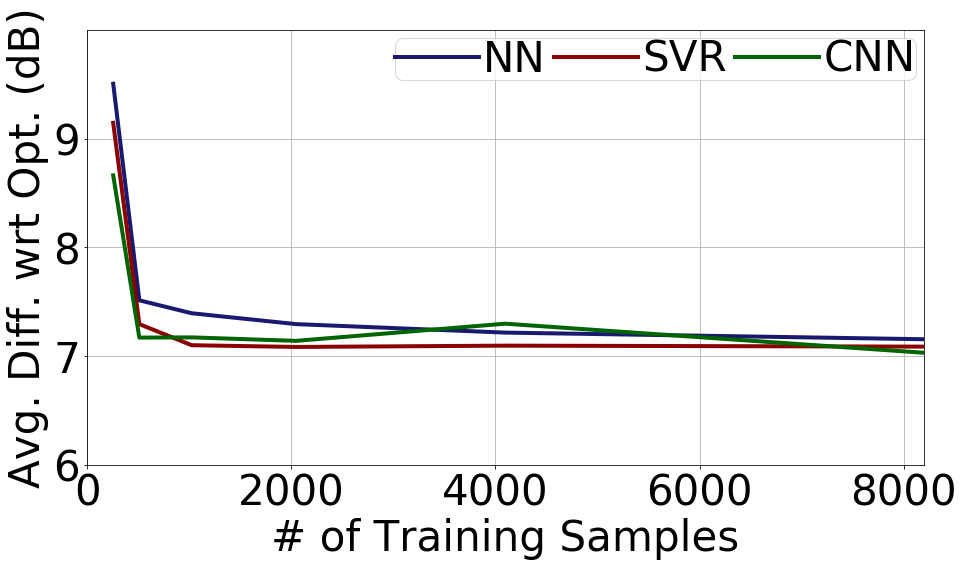

In [53]:
#Splat
### MAX_POWER ANAlysis, Effect of training size using sensors, 
#variable training samples,  field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {"dynamic_pus_400sensor_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_13_03.txt",
#""dynamic_pus_max_power_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_13_03.txt}
# 
# comparing CNN and previous machine learning algos using sensor readings.

training_samples = [256, 512, 1024, 2048, 4096, 8192]
# print(len(number_samples))

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# sensors = True
average_diff = []
fp = []


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([9.505, 7.513, 7.394, 7.294, 7.216, 7.155])          
fp.append([2.918, 3.331, 2.959, 3.68, 3.378, 3.516])
# [0.1, 0, 0.01, 0, 1, 1]

## SVR
average_diff.append([9.145, 7.294, 7.1, 7.084, 7.096, 7.087])
fp.append([3.023, 3.267, 3.306, 3.406, 3.405, 3.472]) 



## CNN
average_diff.append([8.662, 7.17, 7.172, 7.14, 7.298, 7.031])
fp.append([1.272, 2.779, 3.017, 3.233, 3.211, 3.084]) 
#best_lambda = [0.01, 0, 0.001, 0.001, 0.001, 0]




line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
print(len(training_samples))
print(len(average_diff[0]))
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
# plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3, \n changing number of sensors')
plt.grid(True)

ax.set_yticks(np.arange(4, 10, 1))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([6, 10])
ax.set_xlim([0, 8200])
plt.legend([ 'NN', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_10_20PUs_splat_1000grid_1cell_400sensors.png', 
            bbox_inches = 'tight', pad_inches = 0)

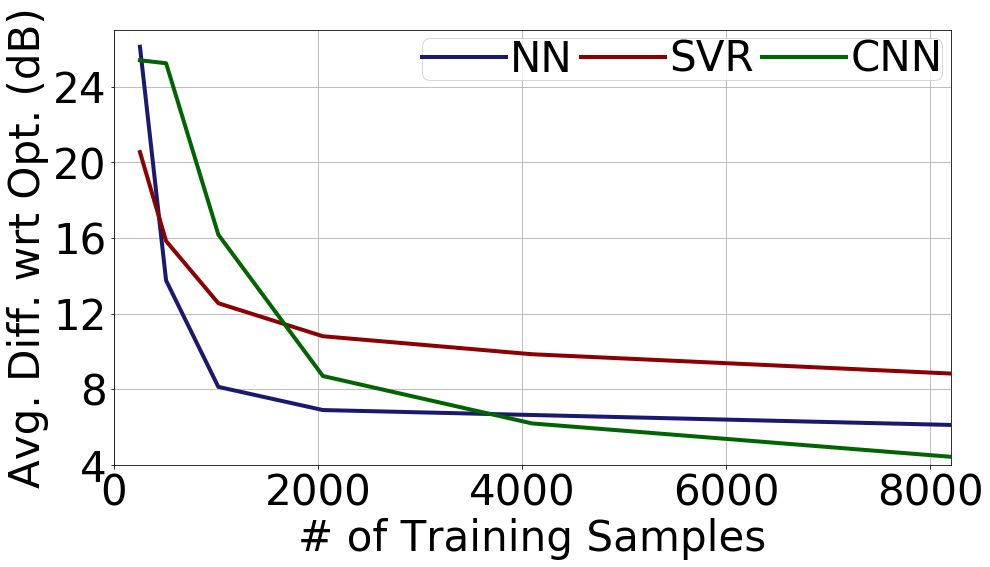

In [54]:
#Splat
### MAX_POWER ANAlysis, Effect of number of SUs changing, Training Set is 8K
#variable training samples,  field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {"dynamic_pus_using_pus_100000_min10_max20PUs_min1_max4SUs_square100grid_splat_2020_06_16_02_37.txt",
#""dynamic_pus_max_power_100000_min10_max20PUs_min1_max4SUs_square100grid_splat_2020_06_16_02_37.txt}
# 
# comparing CNN and previous machine learning algos using sensor readings.

number_samples = [256, 512, 1024, 2048, 4096, 8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 4
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# sensors = True
average_diff = []
fp = []


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([26.112, 13.751, 8.121, 6.896, 6.634, 6.109])          
fp.append([19.672, 3.619, 2.615, 3.705, 3.477, 2.944])

## SVR
# average_diff.append([27.796, 23.114, 16.885, 14.007, 12.563, 11.195])
average_diff.append([20.539, 15.835, 12.544, 10.799, 9.848, 8.828]) # <-90 replaced by -90
# fp.append([23.373, 18.602, 12.045, 9.345, 8.139, 6.96]) 
fp.append([16.119, 11.324, 8.078, 6.579, 5.92, 5.136]) # <-90 replaced by -90



## CNN
# average_diff.append([32.701, 31.267, 28.871, 10.356, 8.281, 7.002])
average_diff.append([25.396, 25.236, 16.172, 8.696, 6.189, 4.427]) # <-90 replaced by -90
# fp.append([28.188, 26.475, 28.037, 7.813, 5.243, 3.981])
fp.append([[20.71, 22.125, 14.17, 6.456, 3.672, 2.512]]) # <-90 replaced by -90
#best_lambda = [0.01, 0, 0.001, 0.001, 0.001, 0.001]




line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
# plt.title('Dynamic PUs(100m*100m)\n, alpha: 3, \n changing number of sensors')
plt.grid(True)

ax.set_yticks(np.arange(4, 27, 4))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([4, 27])
ax.set_xlim([0, 8200])
plt.legend([ 'NN', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_10_20PUs_1_4SUs_1splat_1000grid_1cell.png', 
            bbox_inches = 'tight', pad_inches = 0)